In [6]:
# Propagation en 2D

!mkdir anim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import os
import imageio
# Longueur L
L = 10

# Vitesse con en metre/
u0 = 1/25
# Con
q0 = 10
def f(x,t):
    x0 = L/5
    sigmax = L/15
    sigmay = L/15
    return  q0*np.exp(-((x-(x0+u0*t))/2*sigmax)**2)

def init_panache(dim):
    mat = np.zeros((dim,dim))
    for i in range (dim):
        for j in range (dim):
            mat[i][j] = f(L*j/dim,0)

        
    return mat
    

def avancement(dim):
    panache_0 = init_panache(dim)
    panache = np.zeros((dim,dim,dim))
    panache[0] = panache_0
    a = (u0*dim/L)

    for t in range (1,100):
        for i in range (dim):
            for j in range (dim):
                if j == 0 :
                    panache[t][i][j] =  (-a + 1)*panache[t-1][i][j]
                else:
                    panache[t][i][j] =  (-a + 1)*panache[t-1][i][j] + a * panache[t-1][i][j-1] 
    
    #On crée les images et on les enregistre dans un fichier anim
    for i in range(0, 100):
        #liste_panache.append(panache[i])
        mpimg.imsave(f'anim/panache_{i}.png',panache[i])
        plt.close


avancement(100)


liste_fichier = []
liste_fichier = os.listdir("C:/Users/mulle/Downloads/anim")
#print(liste_fichier)
liste_panache = []
for i in range(0,100):
    im = Image.open(f'anim/panache_{i}.png')
    new_im = im.resize((500, 500))
    liste_panache.append(new_im)

liste_panache[0].save('anim/panache.gif', save_all = True, append_images = liste_panache[1:], optimize = False, duration = 10)

Un sous-répertoire ou un fichier anim existe déjà.


In [ ]:
!mkdir anim4
from PIL import Image
from PIL import ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import os
import imageio

L = 50
sigmax = L/20
sigmay = L/20
u0 = 10
q0 = 10    # 1/((np.pi *2)**(1/2) * sigmax) 
a = random.randint(1,9)
print(a)
b = random.randint(1,9) 
print(b)
x0 = 2*L/10
y0 = 2*L/10
def u(x,y):
    return 3*x + 3*y #1 + np.sin(16*x/5*L - t/20)
#def w(y,t):
#    return L*(0.4*np.sin(33*np.pi /L)) 


def vitesse_max(u,dim):
    U = abs(u(0,0))
    for x in range(dim):
      for y in range(dim):
        if abs(u(x,y)) >= abs(U):
           U =  abs(u(x,y))
        #print(U)
    return U
    
def f(x,y,t):

    return  (q0**2)*np.exp(-(1/2)*((x-(x0+ u(x,y) * t))/sigmax)**2)*np.exp(-(1/2)*((y-(y0+ u(x,y) * t))/sigmay)**2)

def init_panache(dim):
    mat = np.zeros((dim,dim))
    for i in range (dim):
      for j in range (dim):
        mat[i][j] = f(L*j/dim,L*i/dim,0)
    return mat

def avancement(dim):
    pas_long = L/dim
    pas_temps = pas_long / ((10/9)*vitesse_max(u,dim))  #pas long / 2*u
    print(vitesse_max(u,dim),pas_temps)
    panache_0 = init_panache(dim)

    panache = np.zeros((dim*2,dim,dim))
    panache[0] = panache_0
    

    for t in range (1,dim*2):
      for i in range (dim):
        for j in range (dim):
          a = (u(j,i)*pas_temps/pas_long)
          #print(u(j),a)
          if a > 0:
              if j == 0 :
                panache[t][i][j] =  (-a + 1)*panache[t-1][i][j]
              else:
                panache[t][i][j] =  (-a + 1)*panache[t-1][i][j] + a * panache[t-1][i][j-1] 
          else:
              if j == dim -1:
                  panache[t][i][j] =  (a + 1)*panache[t-1][i][j]
              else:
                  panache[t][i][j] =  (a + 1)*panache[t-1][i][j] - a * panache[t-1][i][j+1] 
          if t <100 or t>300:
            panache[t][i][j] = panache[t][i][j] + panache[0][i][j]
            
            
            
#    for k in range(1,dim*2,5):
#       plt.imshow(panache[k],cmap = plt.cm.gist_stern)  # jet, gist_stern, gnuplot(2), seismic
#       #plt.savefig(f'image/{t:003}',dpi=100, format='png')
#        plt.title('pour t = {}'.format(k))
#        plt.xlabel('axe des x')
#        plt.ylabel('axe des y')
#        plt.xlim(0,L)
#        plt.ylim(0,200)
#        plt.xticks(np.arange(0, dim, dim//4))
#        plt.yticks(np.arange(0, dim, dim//4))
#        plt.axis('scaled')
#        plt.show()

    for i in range(0, 400):
        #liste_panache.append(panache[i])
        #plt.imshow(panache[k],cmap = plt.cm.gist_stern)  # jet, gist_stern, gnuplot(2), seismic
       #plt.savefig(f'image/{t:003}',dpi=100, format='png')
#        plt.title('pour t = {}'.format(k))
#        plt.xlabel('axe des x')
#        plt.ylabel('axe des y')
#        plt.xlim(0,L)
#        plt.ylim(0,200)
#        plt.xticks(np.arange(0, dim, dim//4))
#        plt.yticks(np.arange(0, dim, dim//4))
#        plt.axis('scaled')
        mpimg.imsave(f'anim3/panache_{i}.png',panache[i], cmap = plt.cm.gist_stern)
        plt.close

   
avancement(200)

liste_fichier = []
liste_fichier = os.listdir("C:/Users/mulle/Downloads/anim3")
#print(liste_fichier)
liste_panache = []
for i in range(0,400):
    im = Image.open(f'anim3/panache_{i}.png')
    new_im = im.resize((500, 500))
    liste_panache.append(new_im)

liste_panache[0].save('anim3/panache.gif', save_all = True, append_images = liste_panache[1:], optimize = False, duration = 50)


Un sous-répertoire ou un fichier anim3 existe déjà.


NameError: name 'random' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image
import io
import os

#Utile si on veut créer un dossier pour mettre les images de panache
#directory = "animation"
#parent_dir = "C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet"
#path = os.path.join(parent_dir, directory)
#os.mkdir(path)

#Inititalisation des valeurs
L = 50
sigmax = L/20
sigmay = L/20
u0 = 10
q0 = 10    # 1/((np.pi *2)**(1/2) * sigmax) 
a = random.randint(1,9)
print(a)
b = random.randint(1,9) 
print(b)
x0 = 2*L/10
y0 = 2*H/10
x1 = 2*L/10
y1 = 7*H/10
dim = 200


def u(x,t):
    return 100 #*(1 + np.sin(16*x/5*dim - t/20))

def w(y,t):
    return 100*(0.4*np.sin(33*np.pi /dim - t/50) + np.sin(10*np.pi*(y/dim) - t/66)) 


def vitesse_max(u,dim):
    U = abs(u(0,0))
    for x in range(dim):
        for y in range(dim):
            if abs(u(x,y)) >= abs(U):
                U =  abs(u(x,y))
                #print(U)
    return U


def f(x,xs,y,ys,t):
    return  (q0**2)*np.exp(-(1/2)*((x-(xs+ u(x,y) * t))/sigmax)**2)*np.exp(-(1/2)*((y-(ys+ u(x,y) * t))/sigmay)**2)


def init_panache(dim,xs,ys):
    mat = np.zeros((dim,dim))
    for i in range (dim):
        for j in range (dim):
            mat[i][j] = f(L*j/dim,xs,L*i/dim,ys,0)
    return mat


def avancement(dim):
    pas_long = L/dim
    pas_temps = pas_long / ((10)*vitesse_max(u,dim))  #pas long / 2*u  A arranger n en fonction de w aussi
    print(vitesse_max(u,dim),pas_temps)
    panache_0 = init_panache(dim,x0,y0)
    panache_01 = init_panache(dim,x1,y1)        #Cette ligne a commenter
    panache = np.zeros((dim*2,dim,dim))            #les deux ashtag a enlever pour les points sources
    panache[0] = panache_0 + panache_01        #Celle la avant le +


    for t in range (1,dim*2):
        for i in range (dim):
            for j in range (dim):
                ay = (w(j,i)*pas_temps/pas_long)
                ax = (u(j,i)*pas_temps/pas_long)
                #print(u(j),a)
                if ay > 0:
                    if i == 0:
                        panache[t][i][j] =  (-ay -ax + 1)*panache[t-1][i][j]
                    else:
                        panache[t][i][j] =  (-ay -ax + 1)*panache[t-1][i][j] + ax * panache[t-1][i][j-1] + ay*panache[t-1][i-1][j]
                else:
                    if i == dim -1:
                        panache[t][i][j] =  (ay -ax + 1)*panache[t-1][i][j]
                    else:
                        panache[t][i][j] =  (ay -ax + 1)*panache[t-1][i][j] + ax * panache[t-1][i][j-1] - ay* panache[t-1][i+1][j]
                if t==40 or t == 70:                                                   #A commenter si tu veux enlever la ré émission
                    panache[t][i][j] = panache[t][i][j] + panache_0[i][j]


    for i in range(0,100):
            #liste_panache.append(panache[i])
            #liste_panache.append(panache[i])
            #plt.imshow(panache[k],cmap = plt.cm.gist_stern)  # jet, gist_stern, gnuplot(2), seismic
            #plt.plot(panache[i])
            #plt.title('pour t = {}'.format(i))
            #plt.xlabel('axe des x')
            #plt.ylabel('axe des y')
            #plt.xlim(0,L)
            #plt.ylim(0,200)
            #plt.xticks(np.arange(0, dim, dim//4))
            #plt.yticks(np.arange(0, dim, dim//4))
            #plt.axis('scaled')

            #Ajout d'une colorbar
            #plt.scatter(x=purchaseCount, y=likes, c=ratio, cmap="summer")
            #plt.colorbar(label="Like/Dislike Ratio", orientation="vertical")
            #plt.savefig(f'anim4/panache_{i}.png', dpi=100)

            plt.rcParams["figure.figsize"] = [10, 5]
            plt.rcParams["figure.autolayout"] = True
            plt.imshow(panache[i], cmap="plasma")
            plt.xlabel('x')
            plt.ylabel('y')
            plt.colorbar(label='Densité')
            plt.clim(0,100)            
            plt.title('Panache')
            plt.savefig(f'C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation/panache_{i}.png', dpi=500)
            plt.show()

            #mpimg.imsave(f'C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation/panache_{i}.png',panache[i], cmap = plt.cm.gist_stern)
            #plt.close

avancement(50)

#Pour animer les différentes images de panaches qu'on a pu enregistrer dans le dossier animation
liste_fichier = []
liste_fichier = os.listdir("C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation")
#print(liste_fichier)
liste_panache = []
for i in range(0,100):
    im = Image.open(f'C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation/panache_{i}.png')
    new_im = im.resize((1000, 500))
    liste_panache.append(new_im)

liste_panache[0].save('C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation/panache.gif', save_all = True, append_images = liste_panache[1:], optimize = False, duration = 50)

6
6


NameError: name 'H' is not defined

5
3


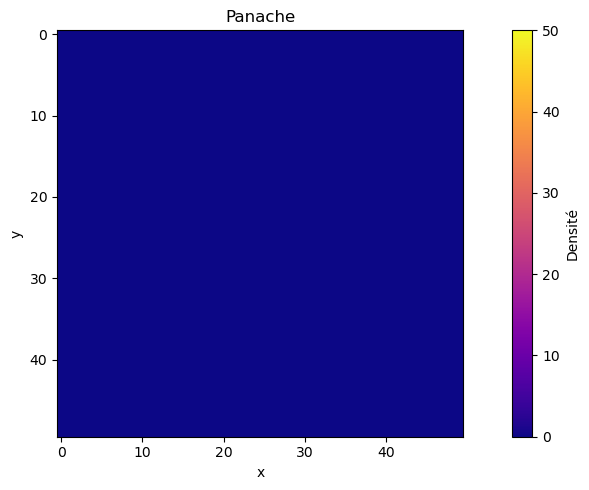

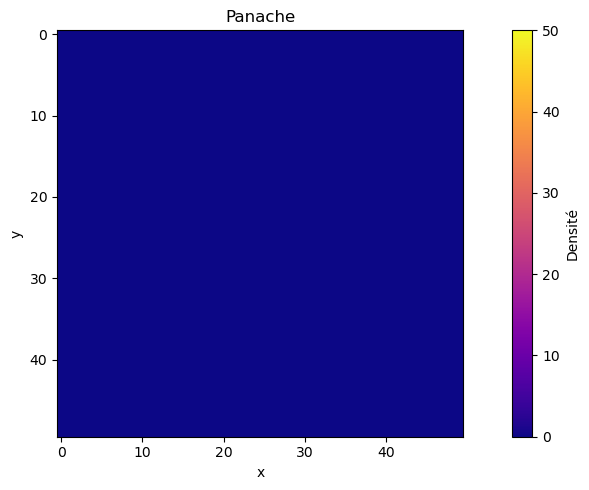

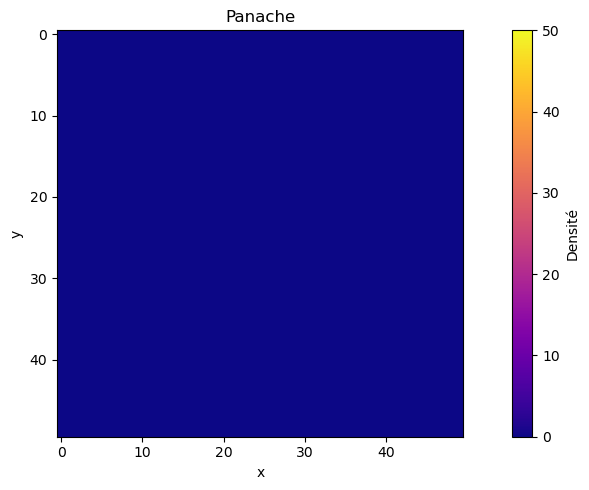

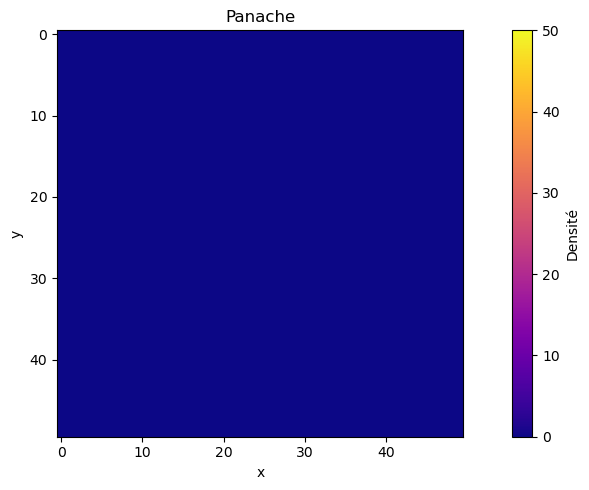

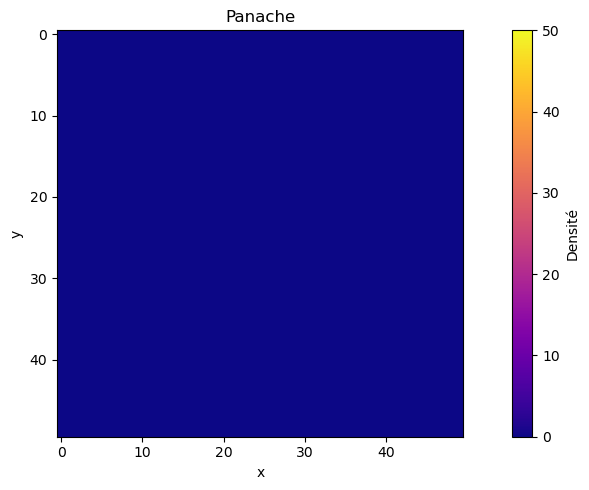

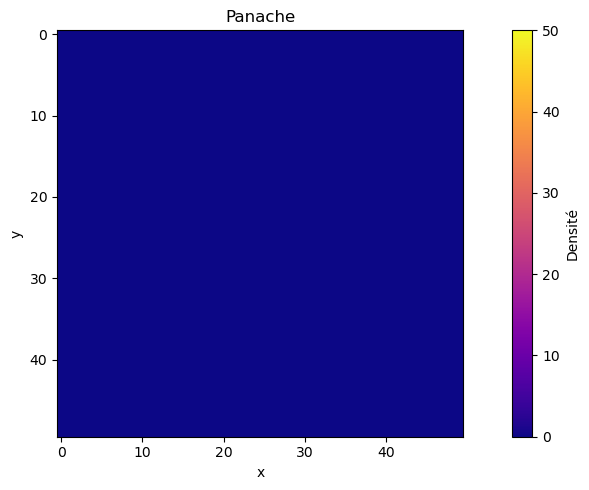

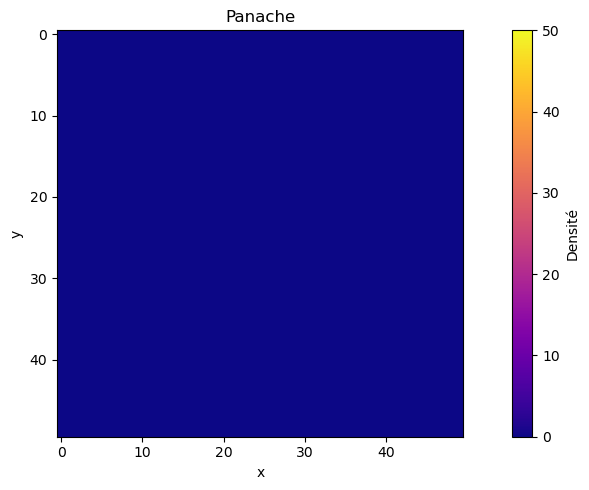

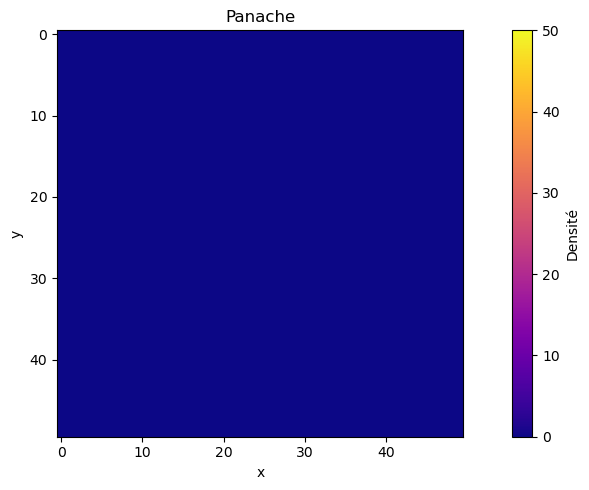

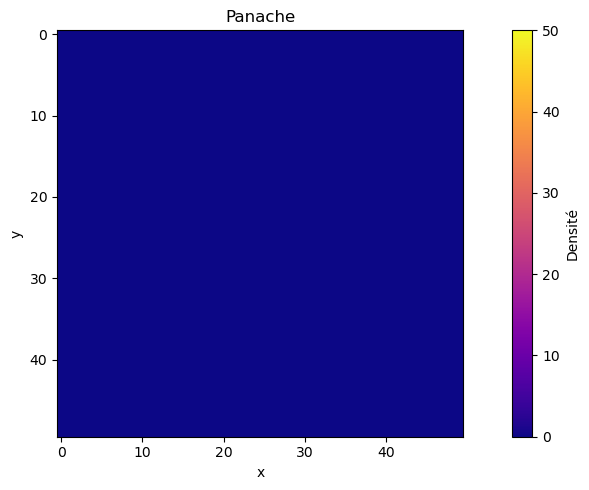

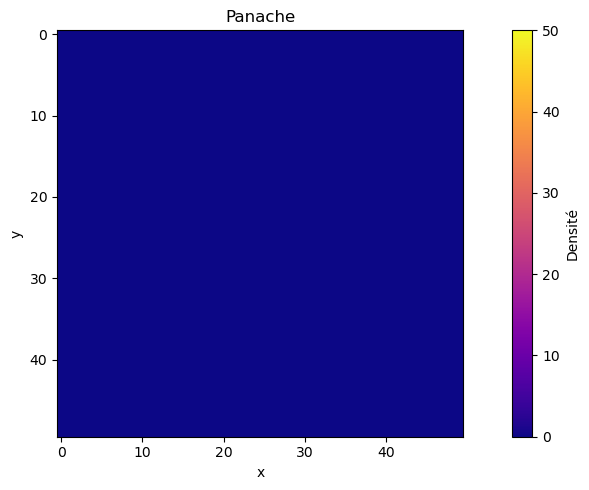

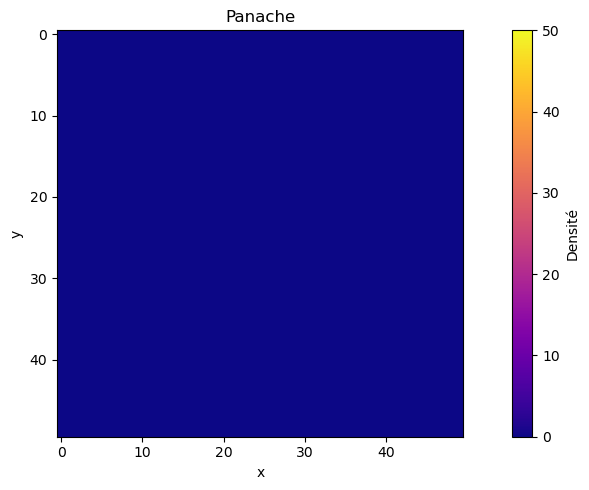

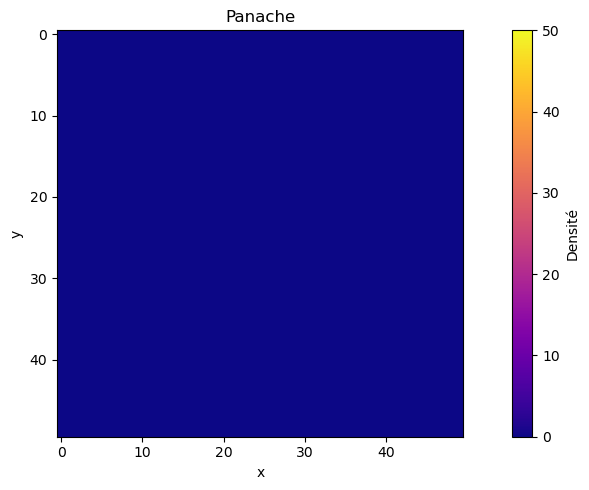

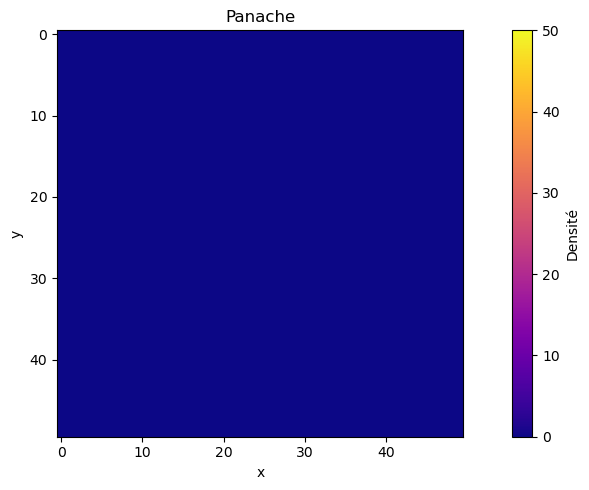

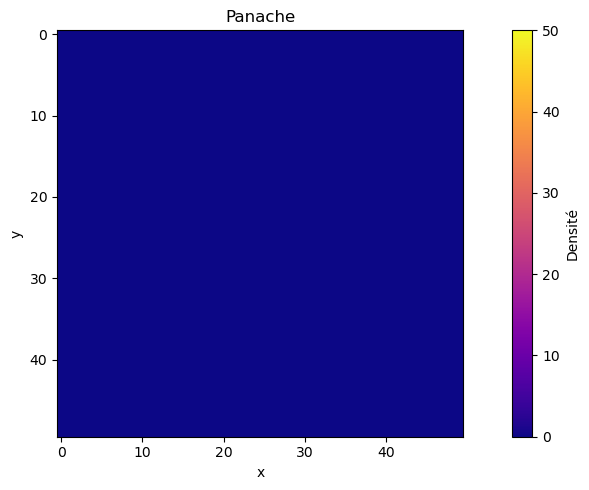

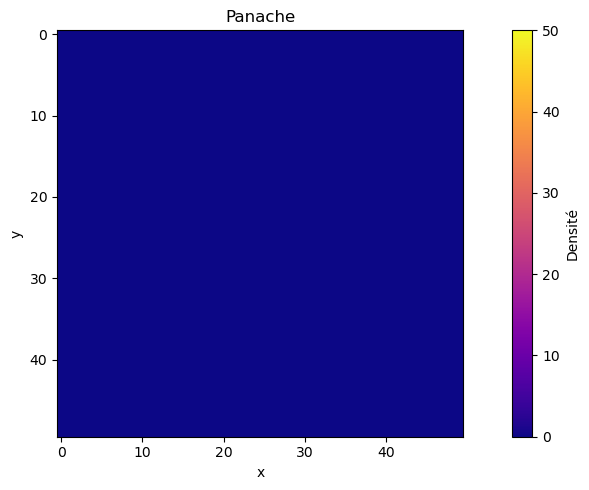

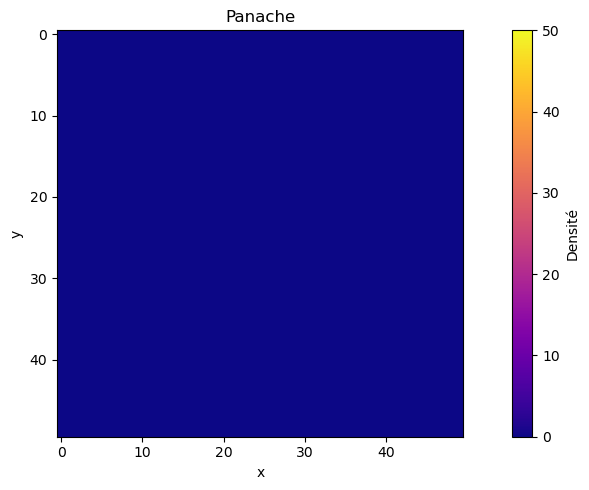

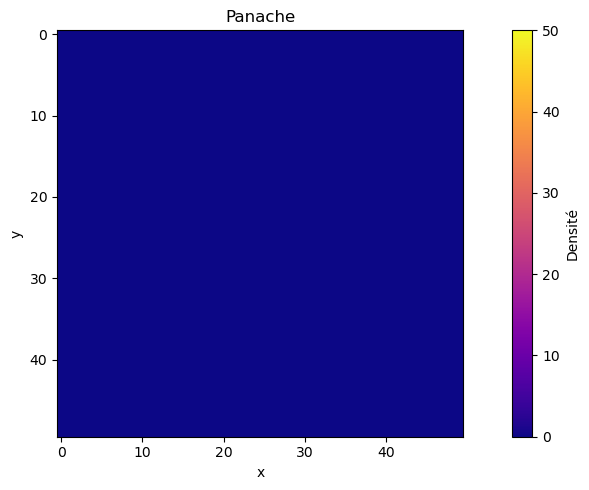

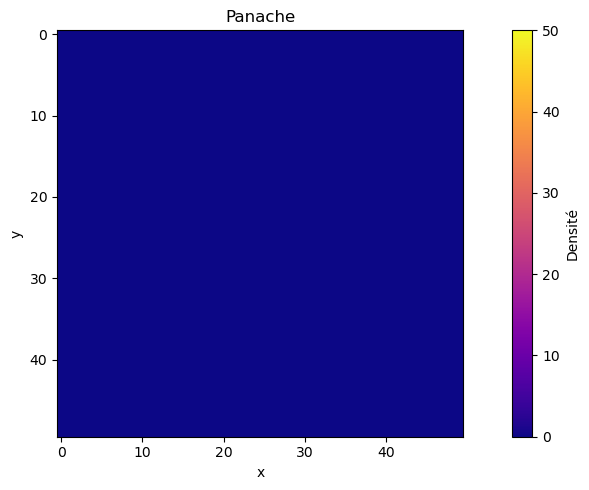

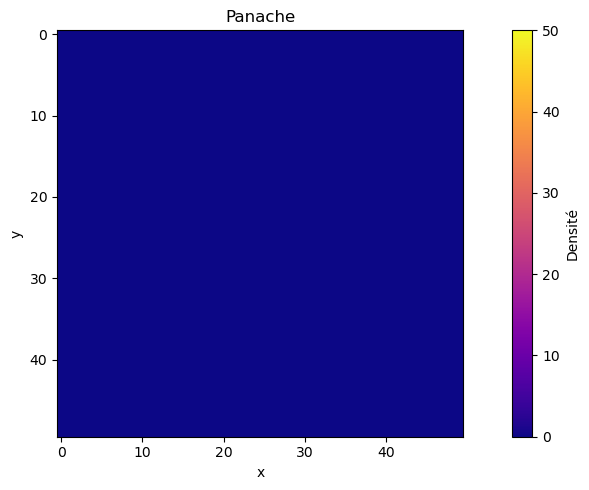

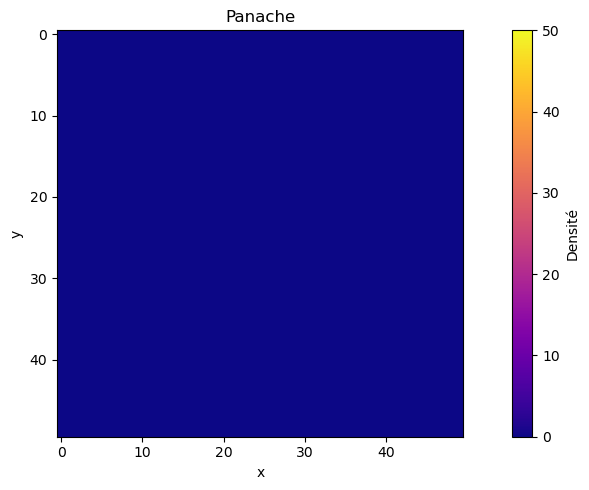

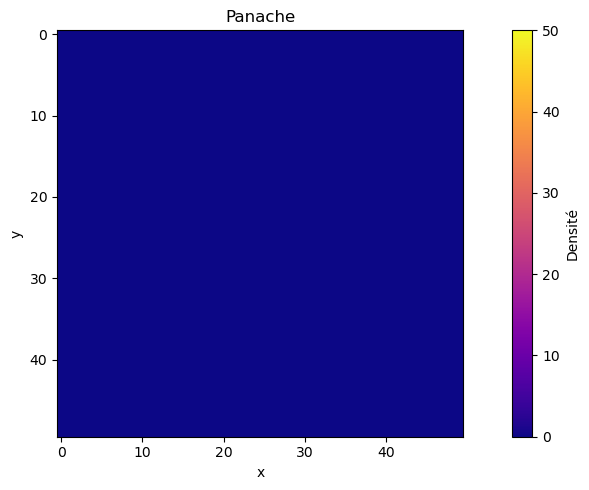

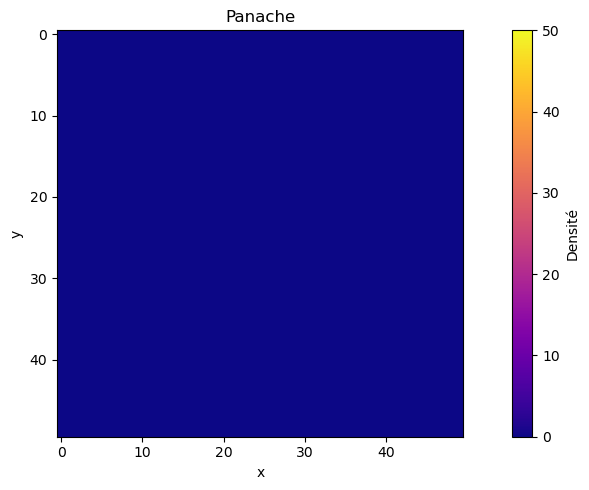

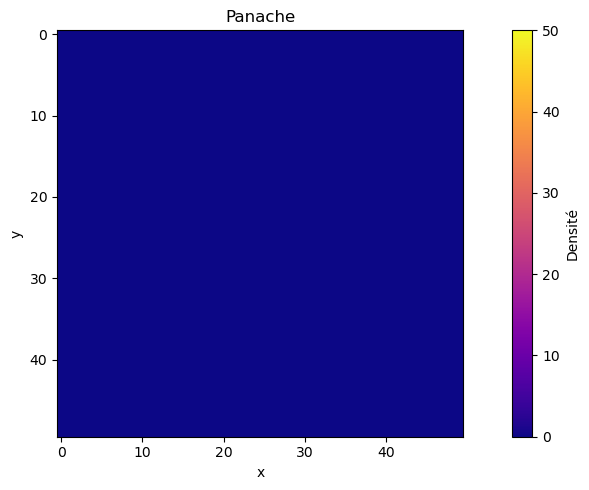

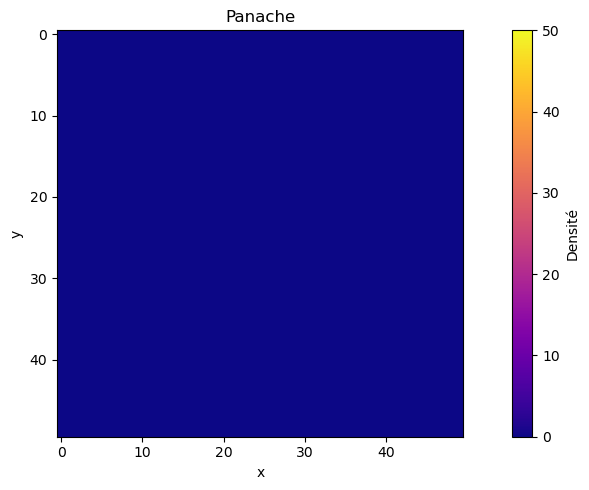

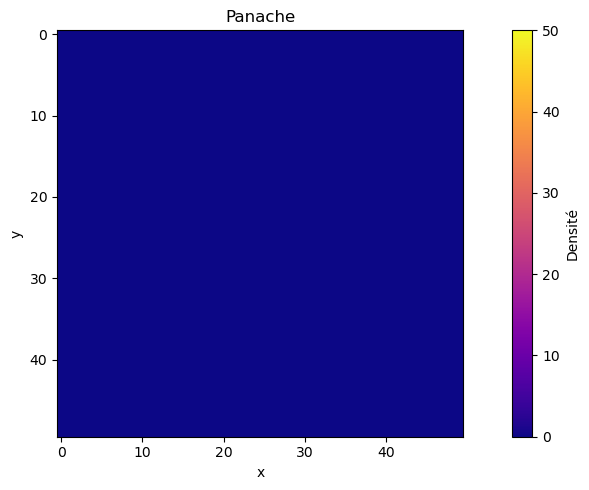

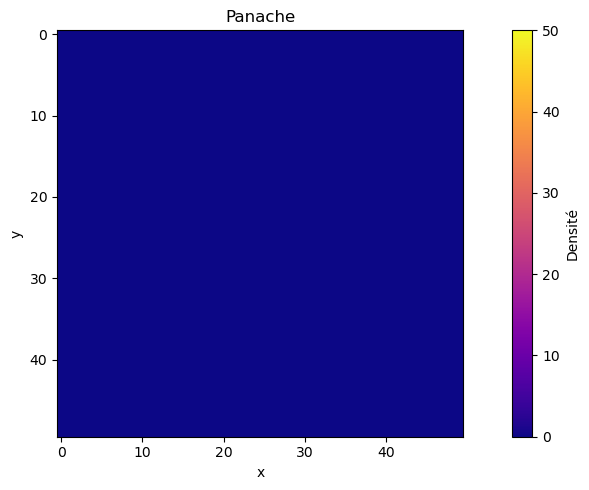

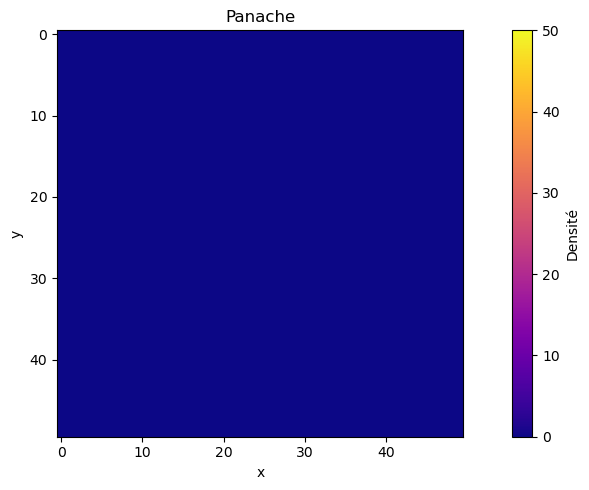

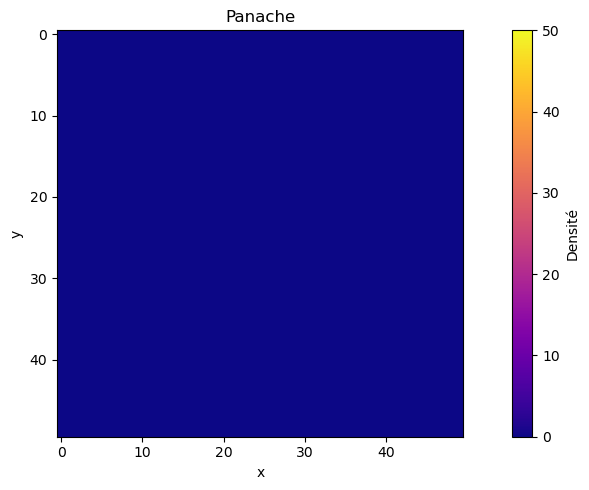

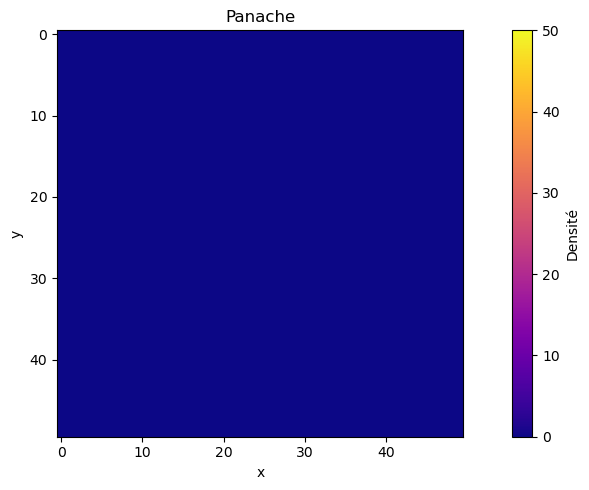

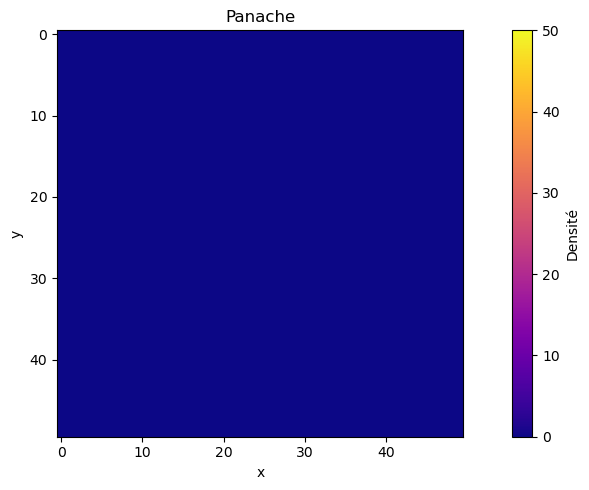

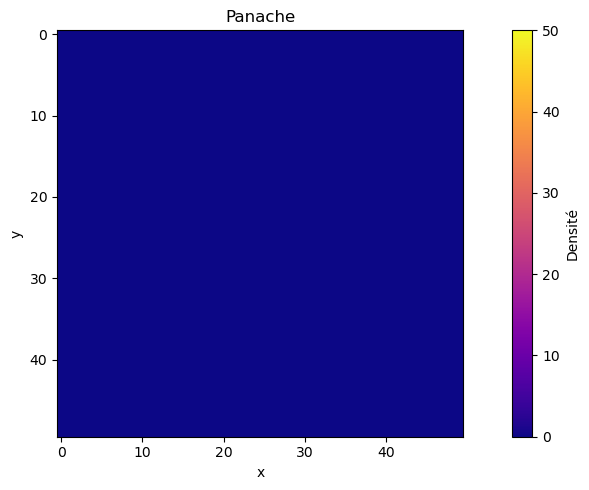

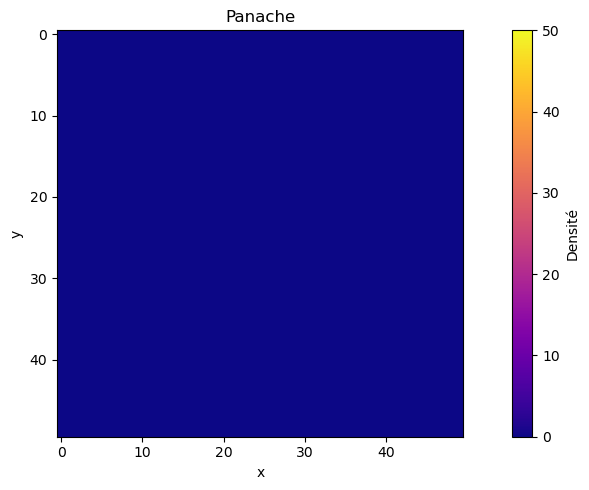

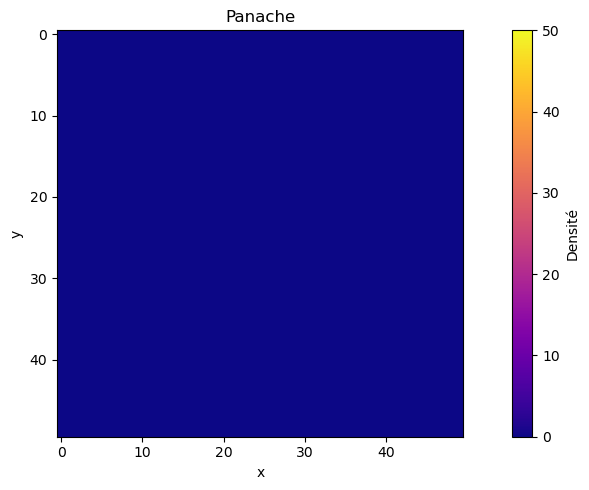

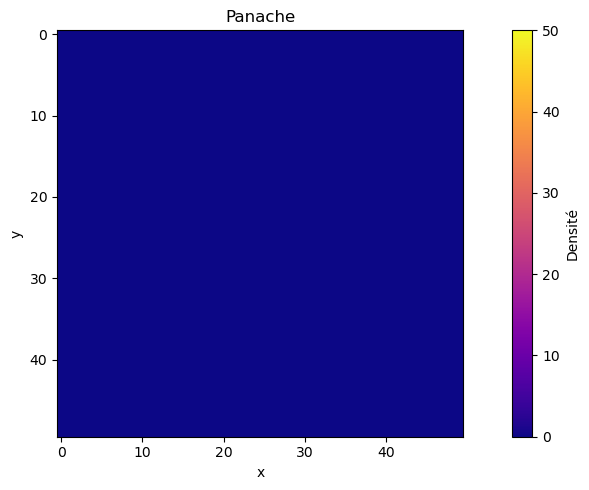

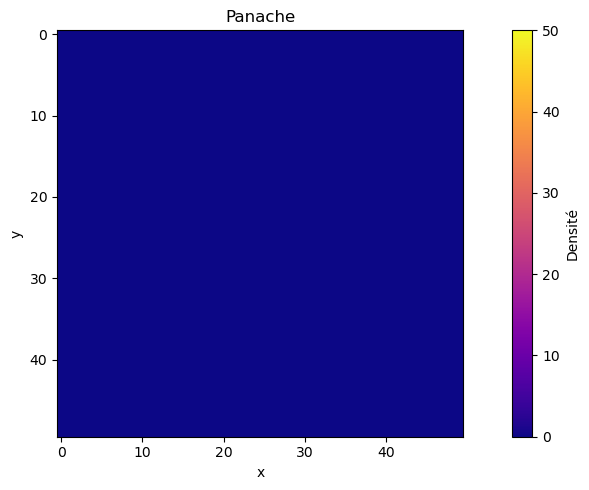

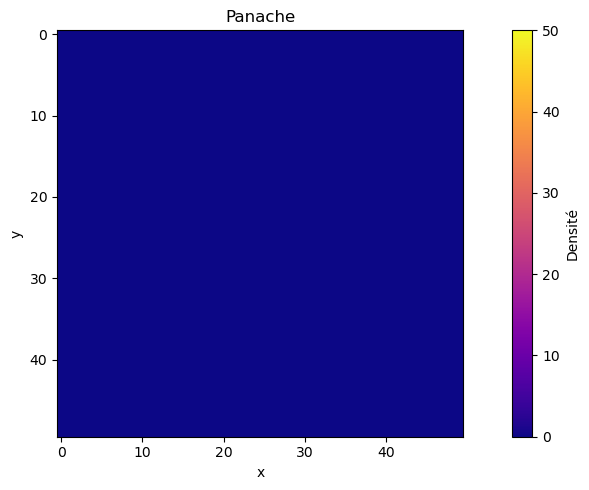

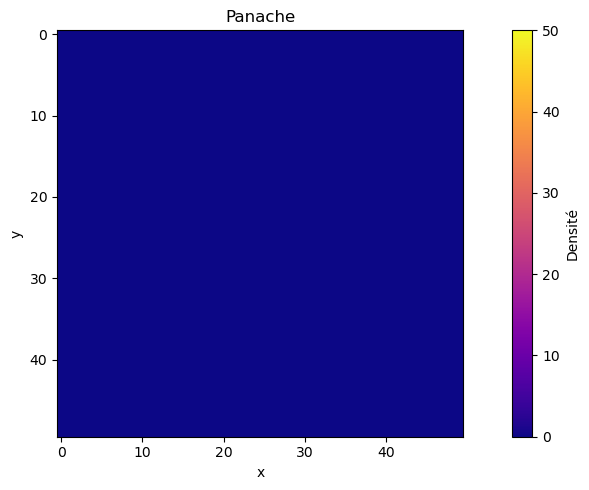

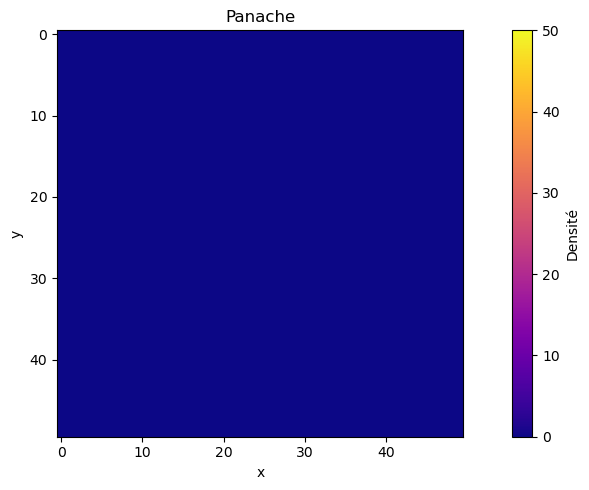

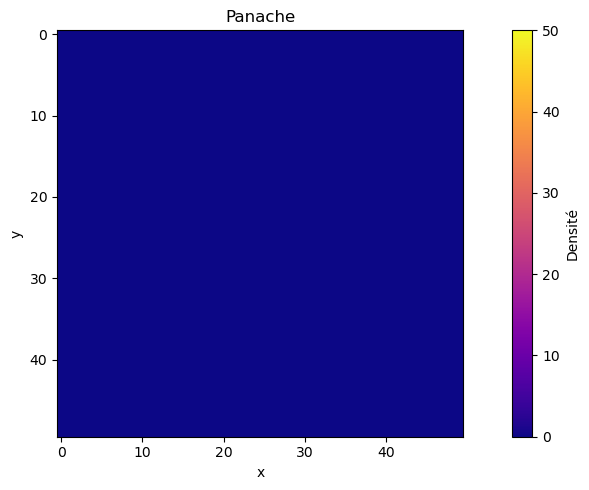

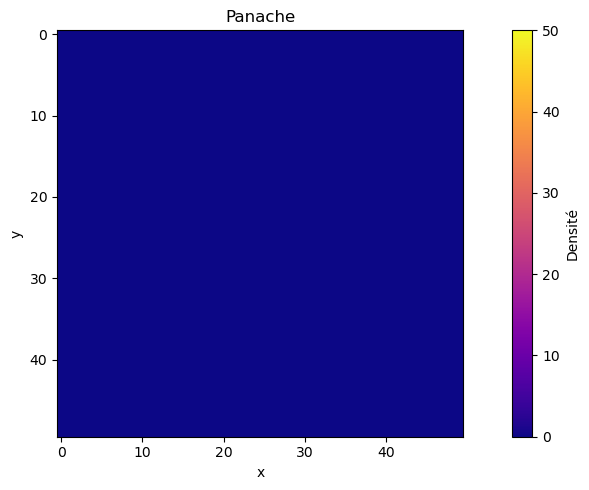

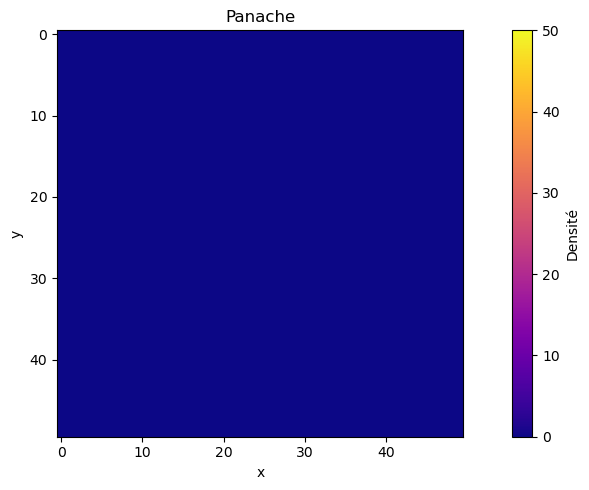

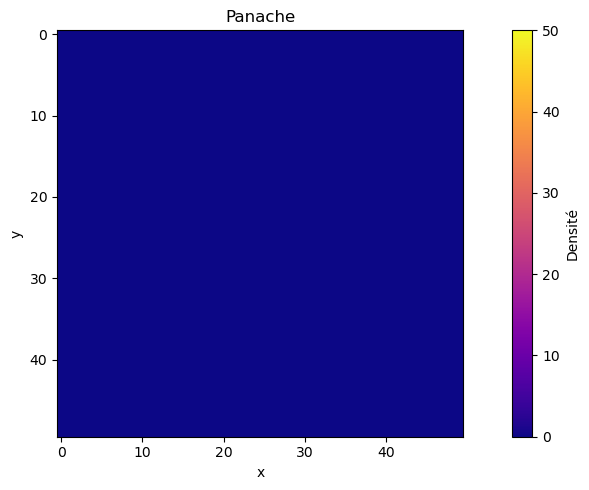

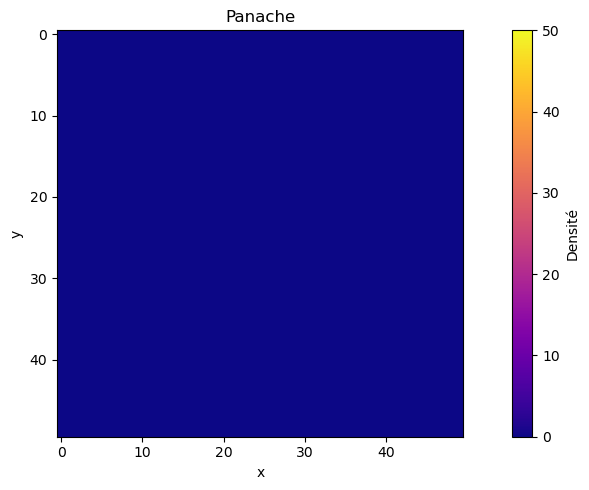

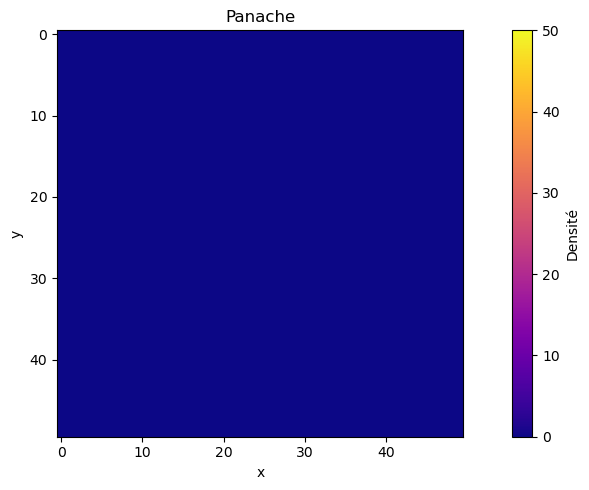

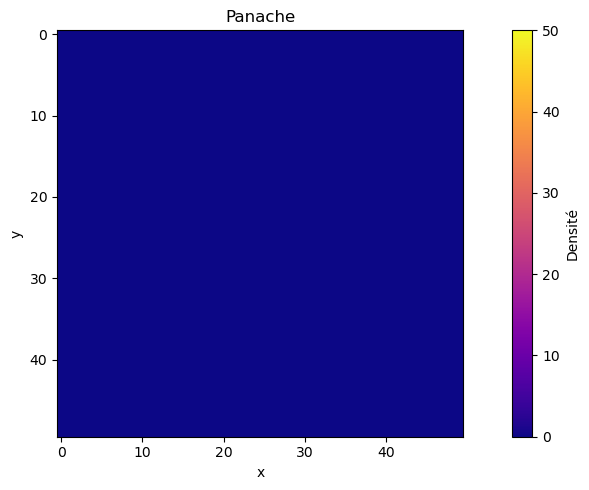

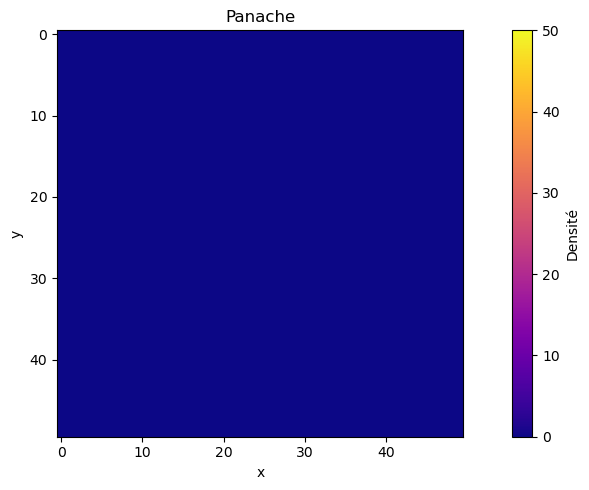

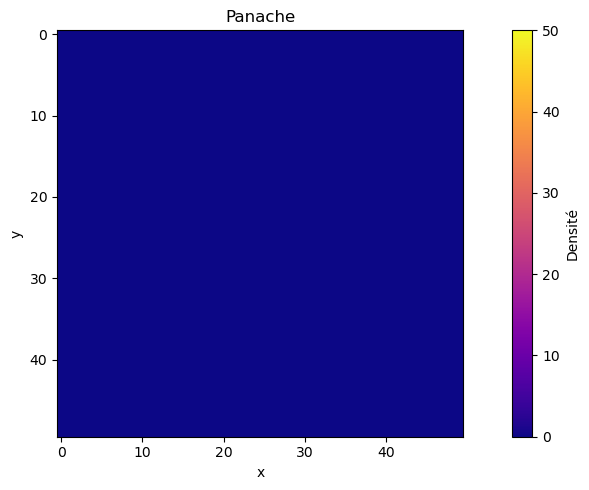

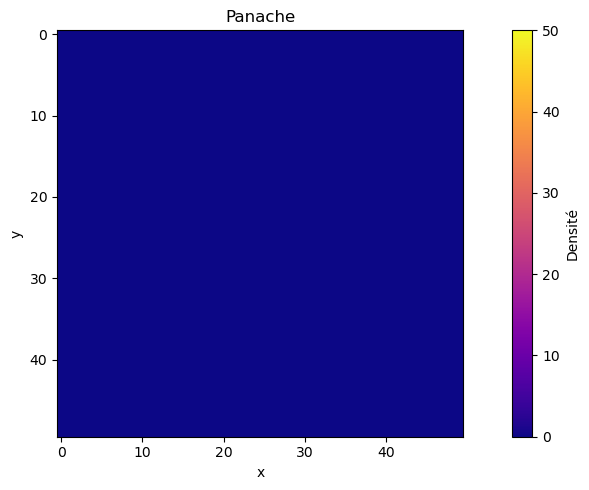

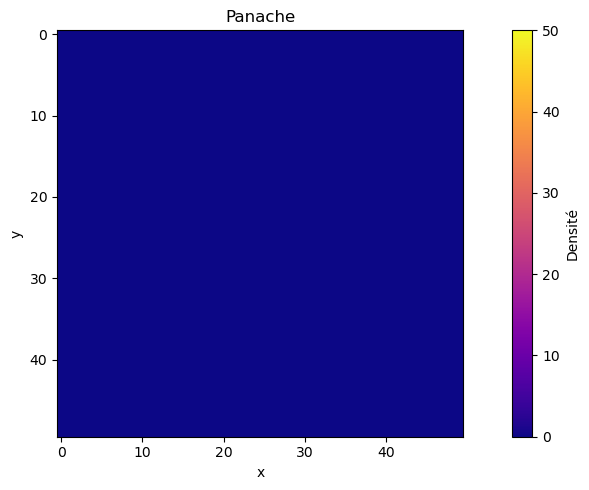

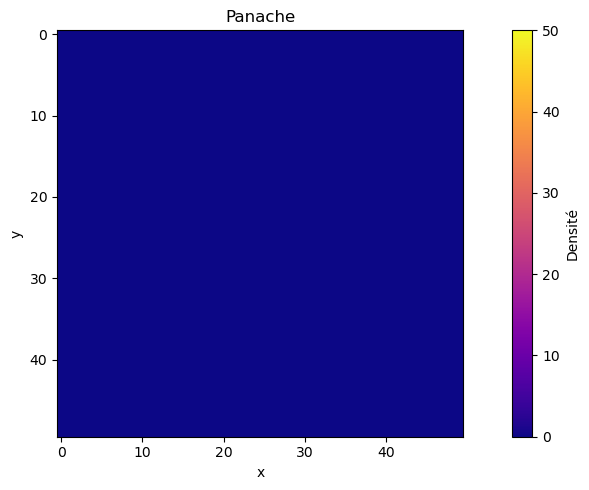

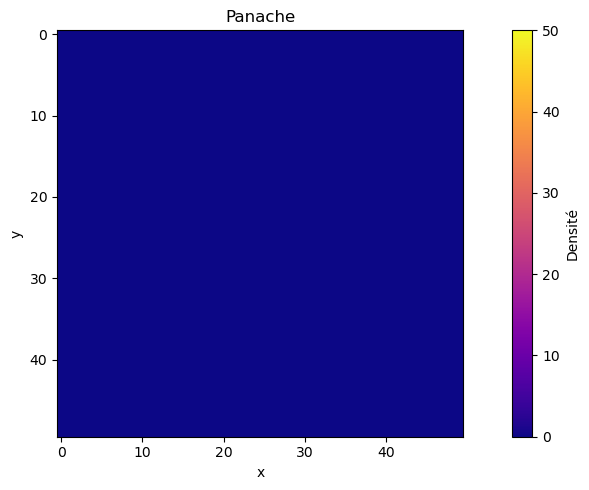

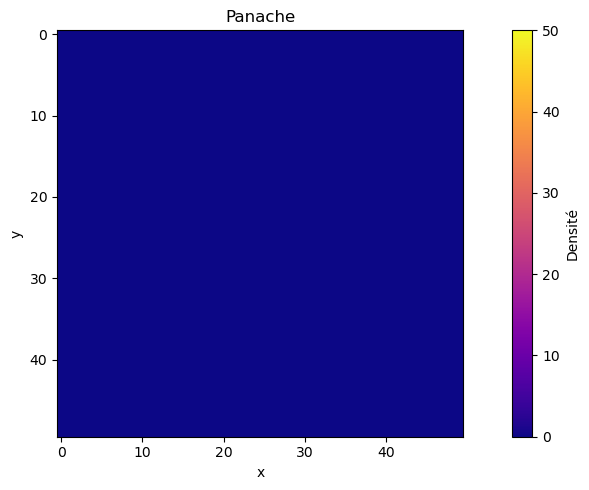

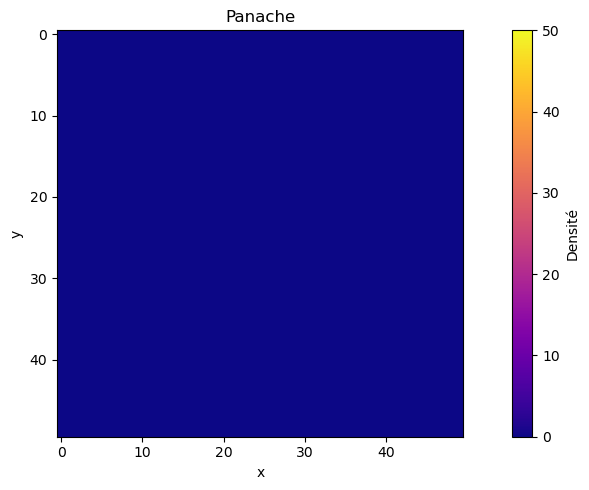

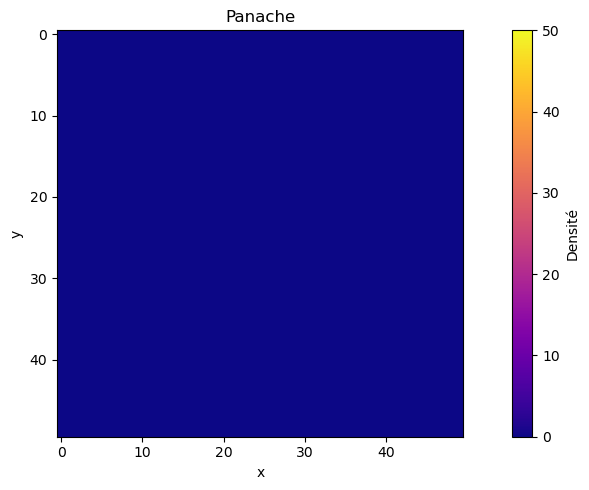

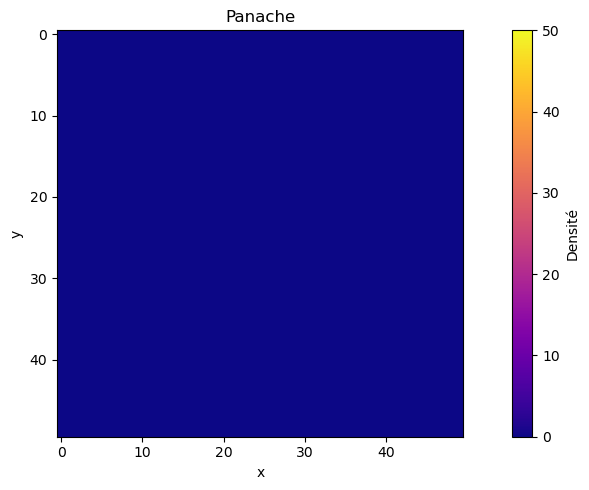

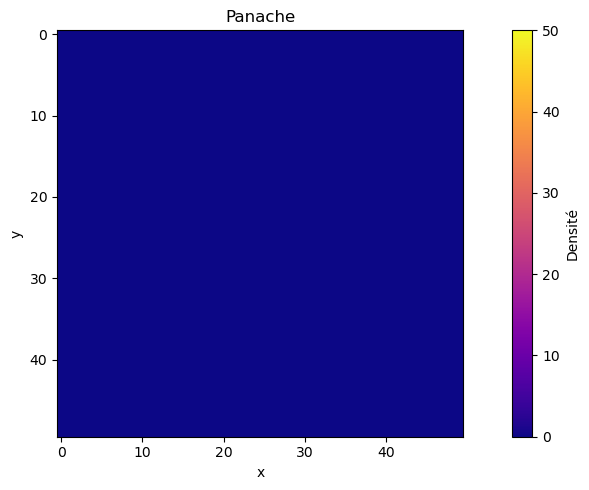

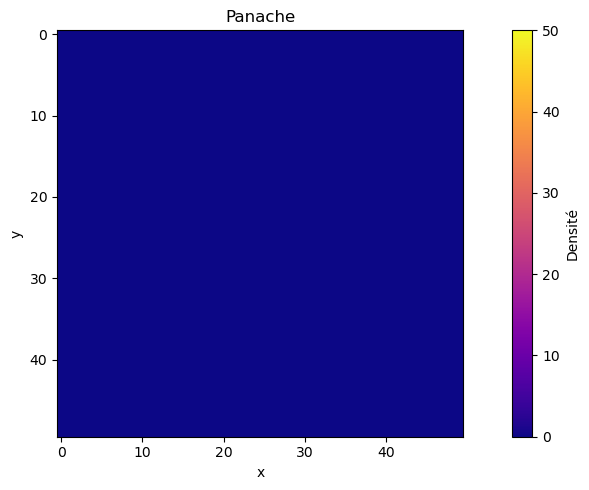

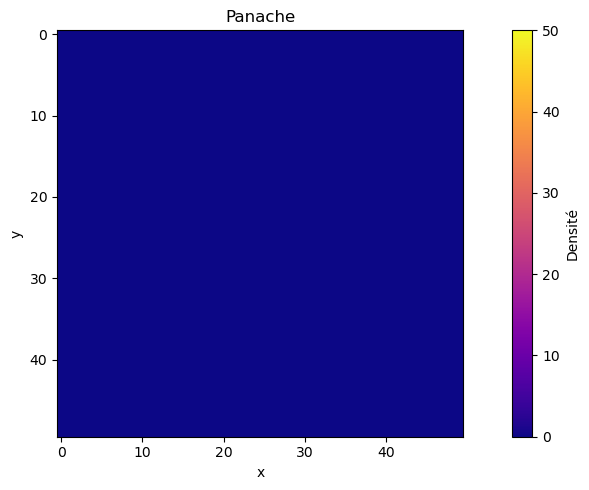

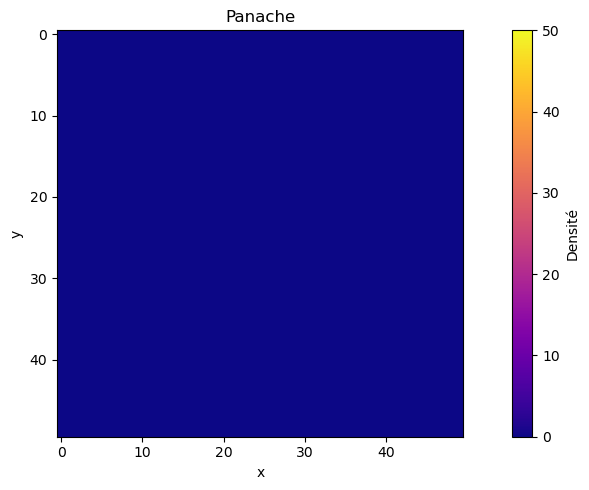

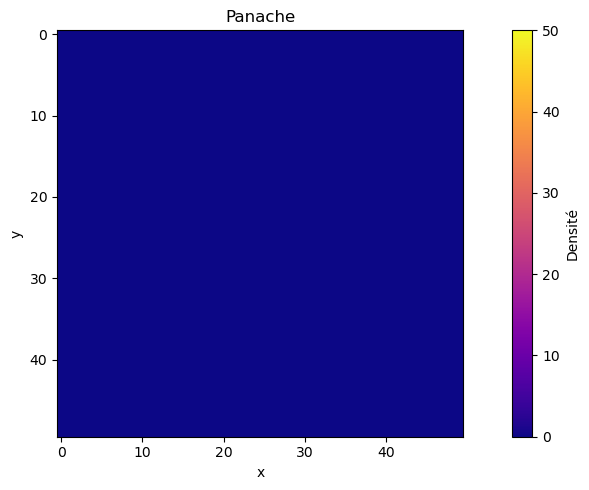

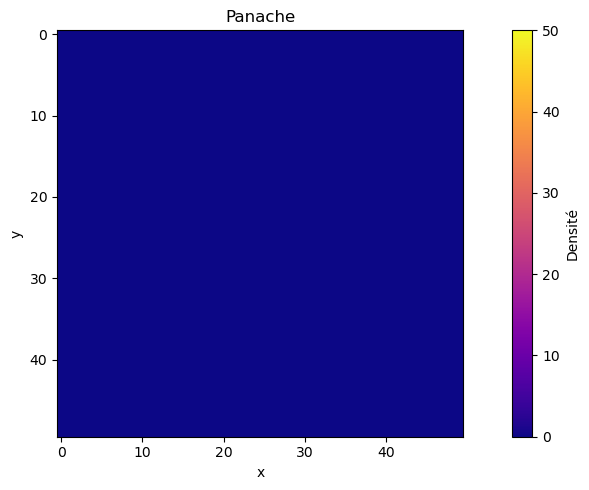

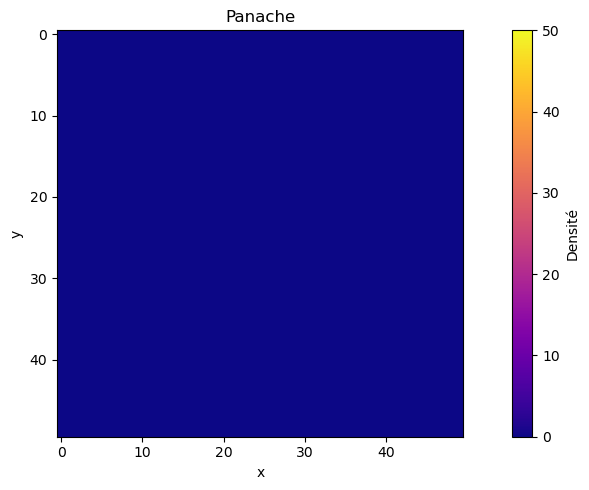

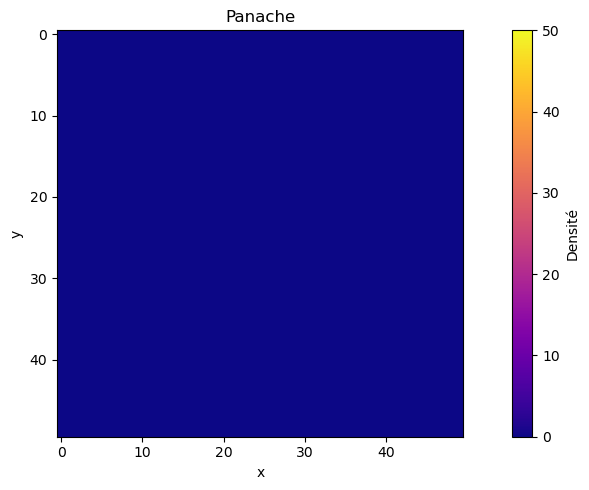

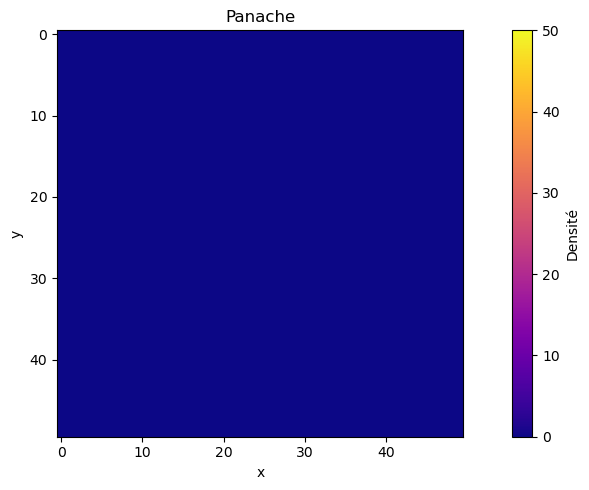

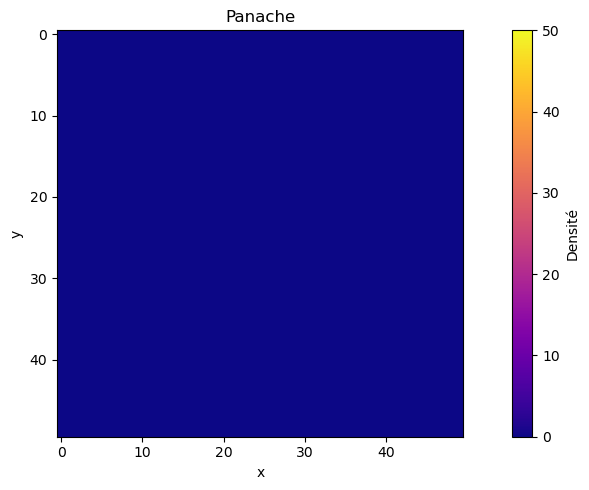

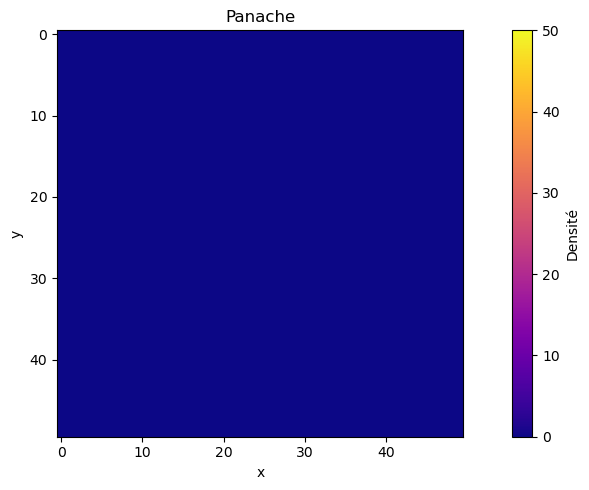

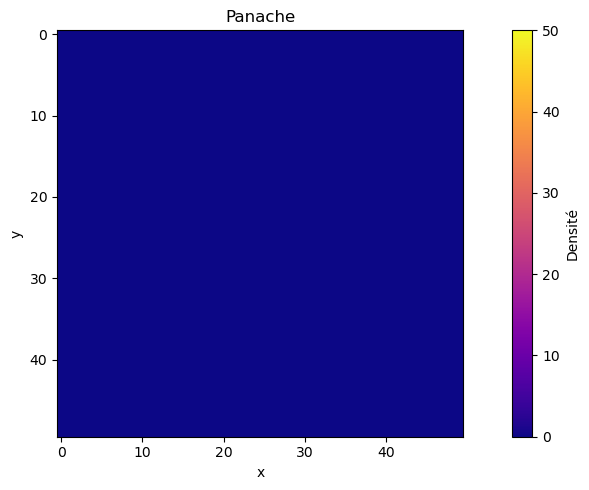

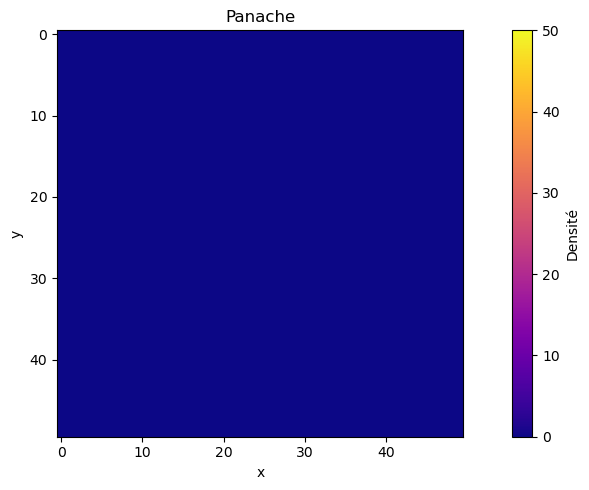

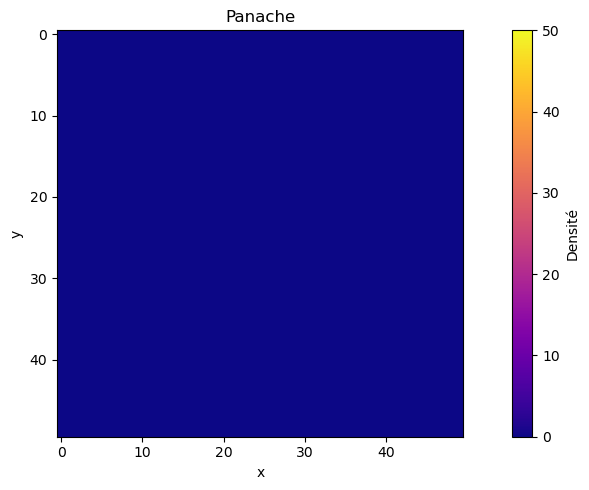

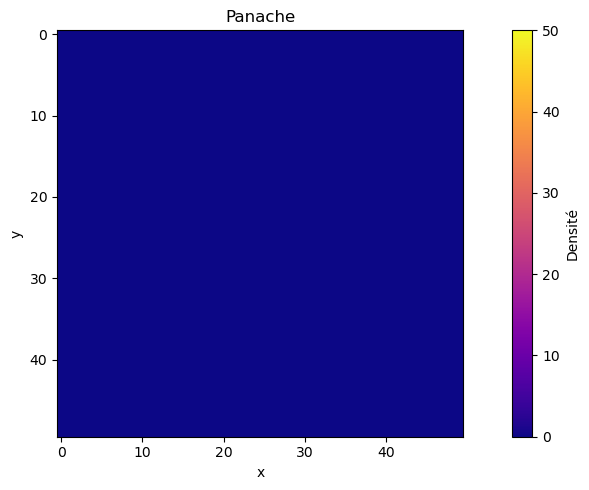

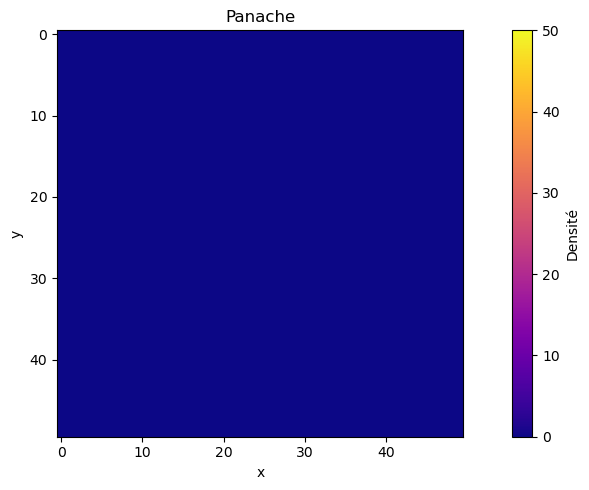

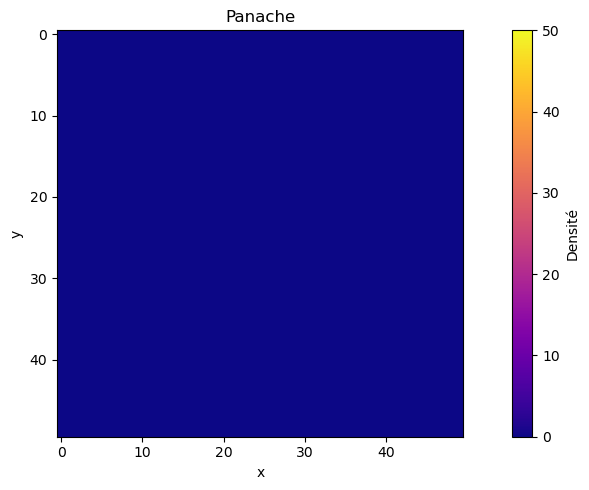

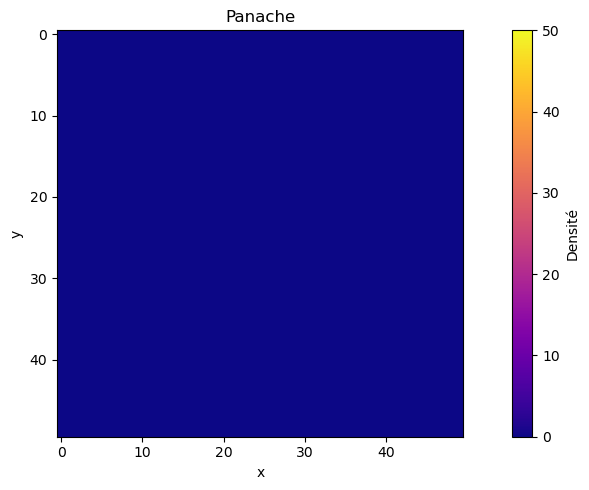

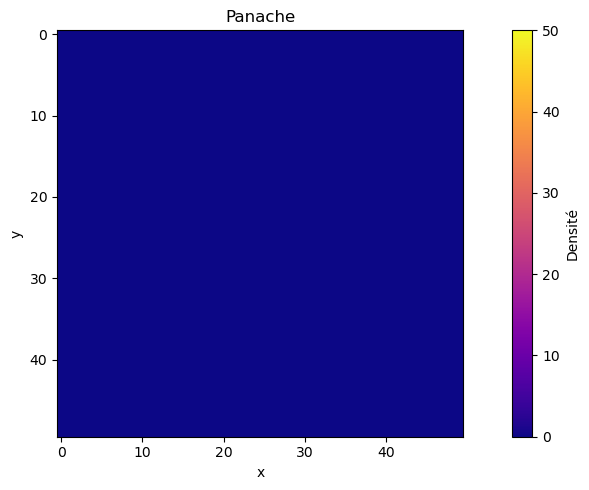

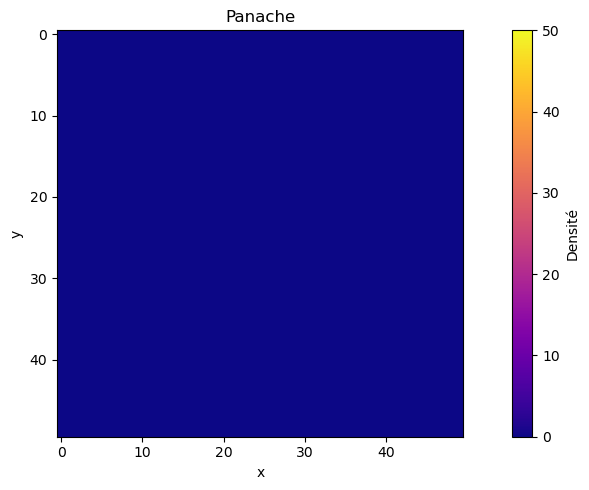

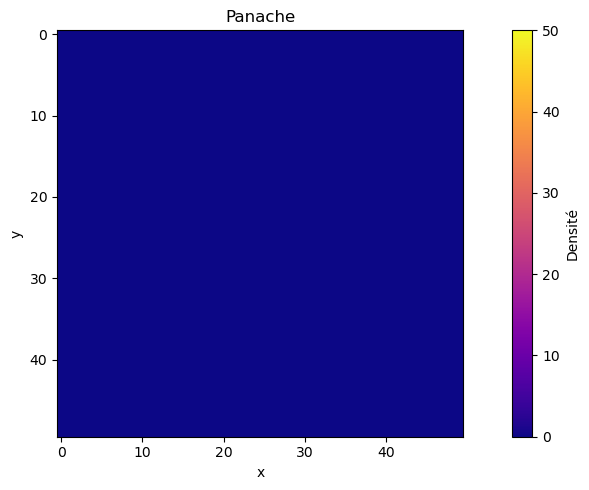

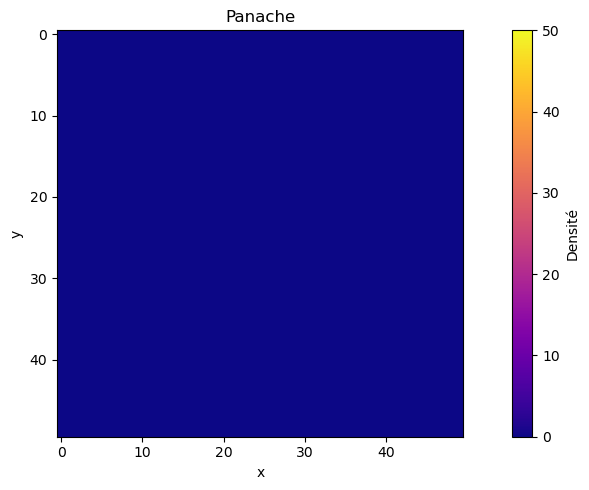

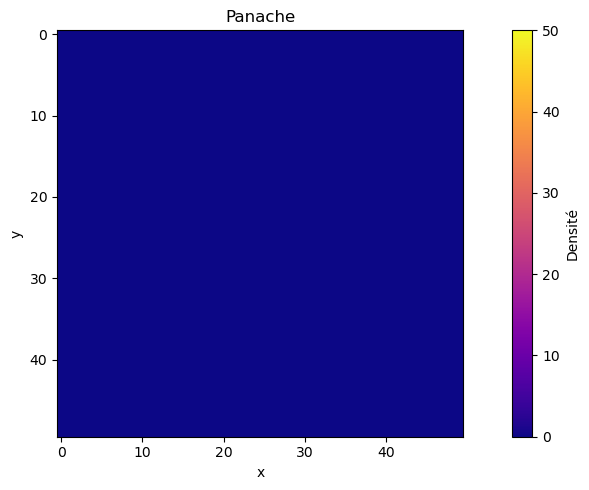

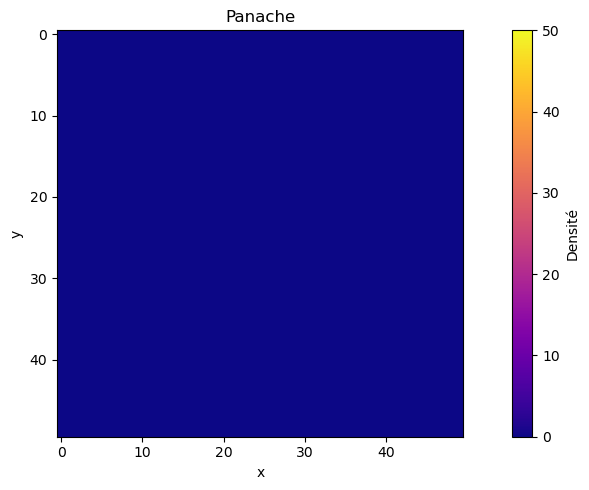

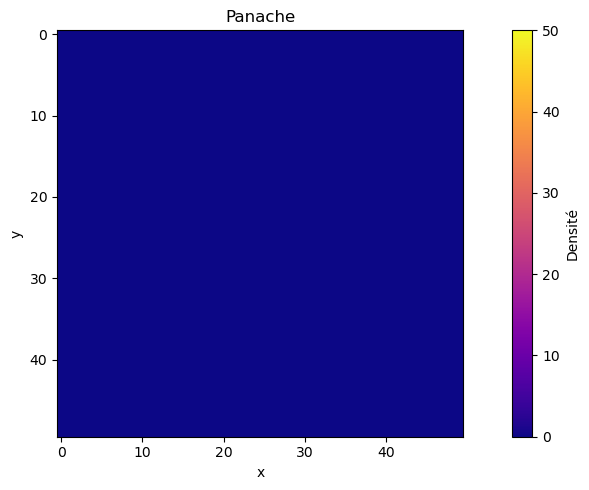

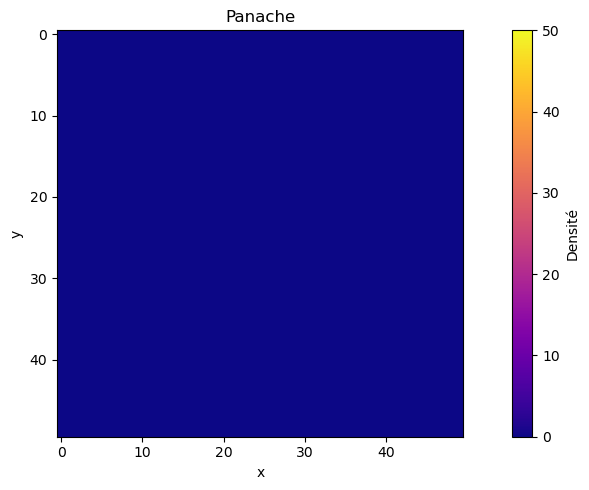

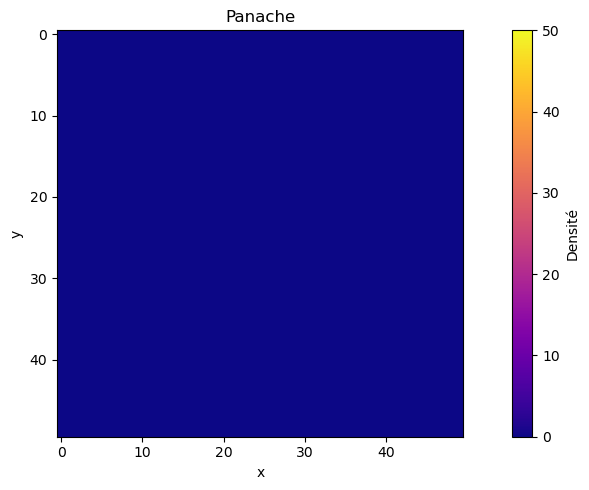

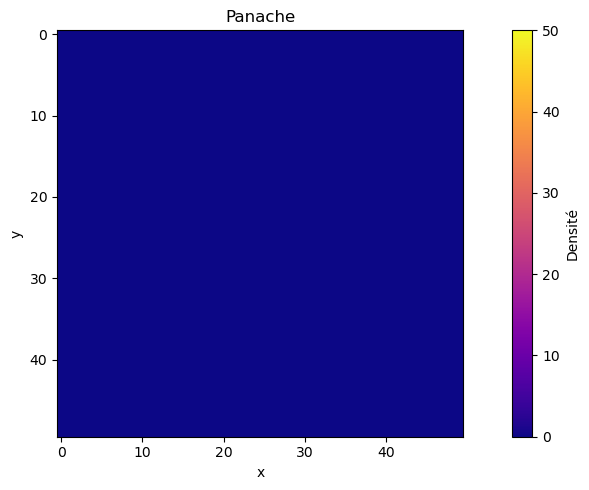

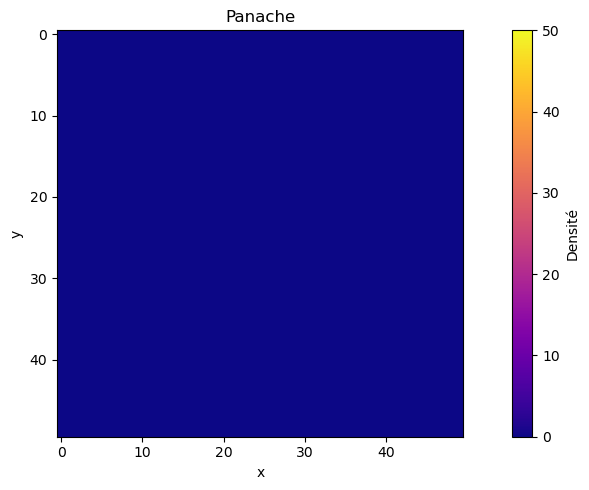

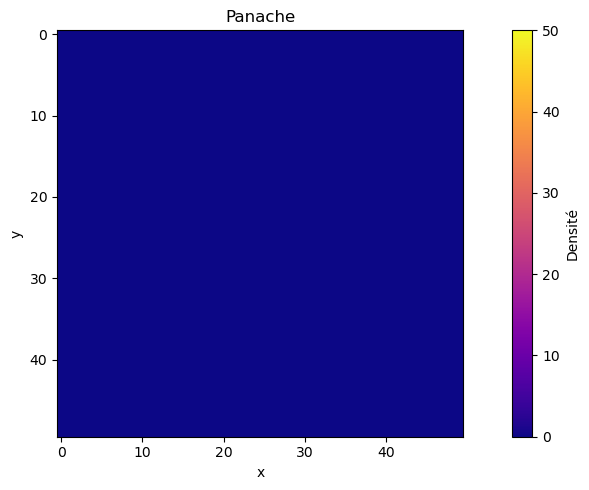

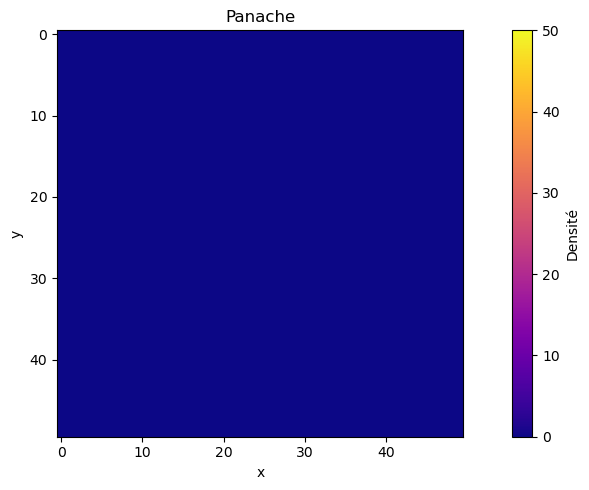

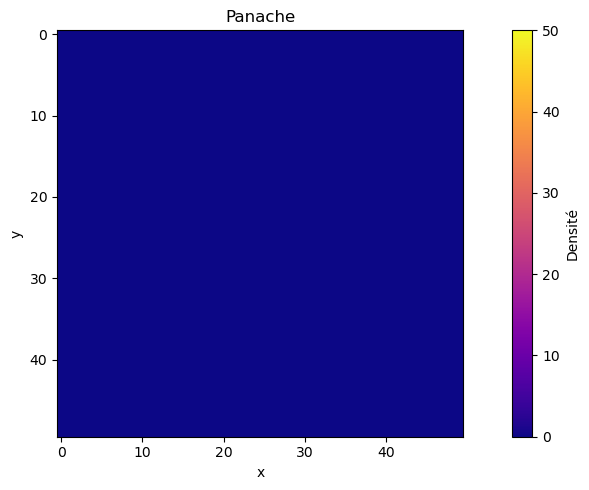

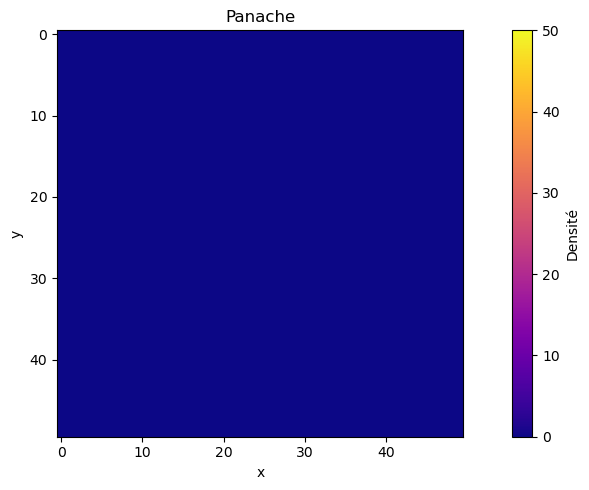

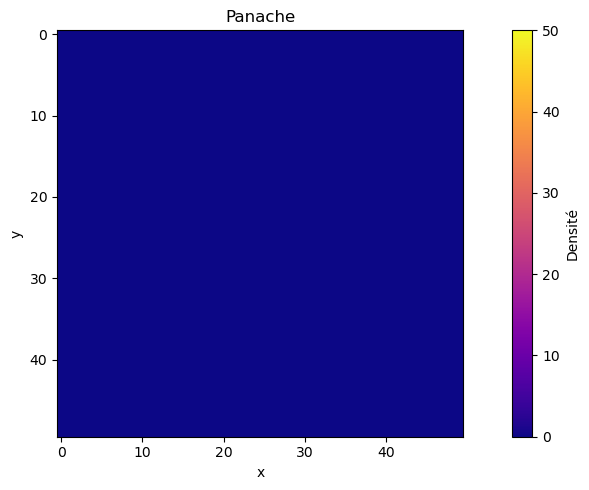

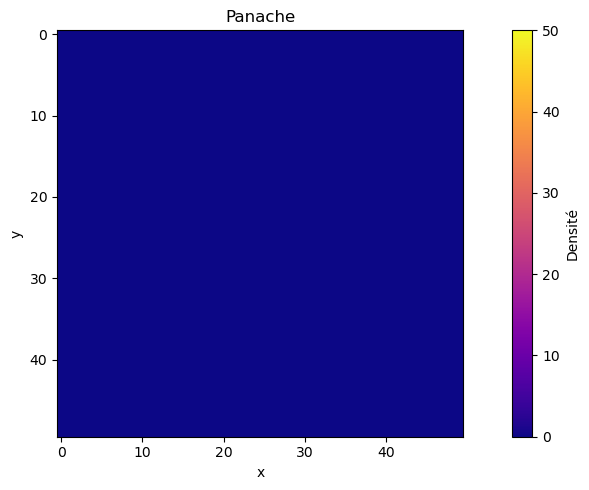

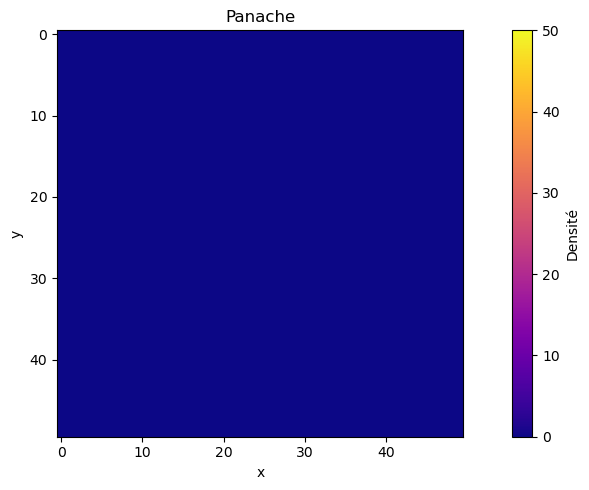

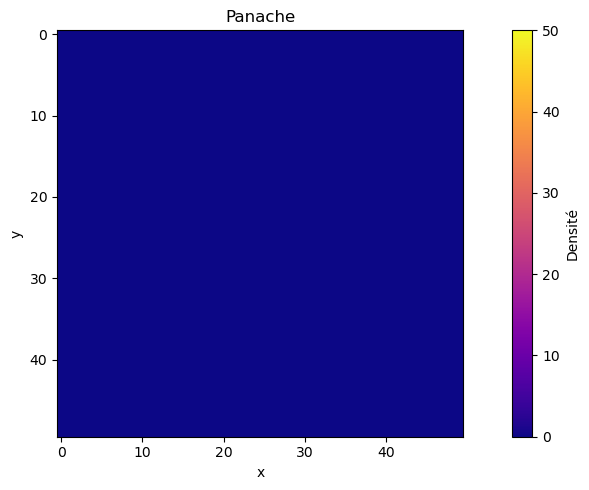

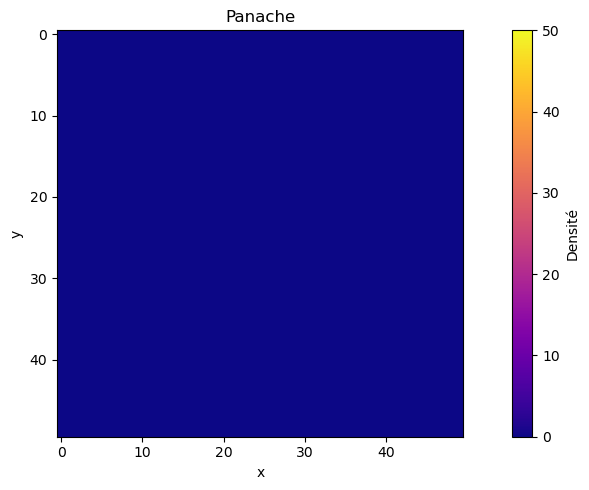

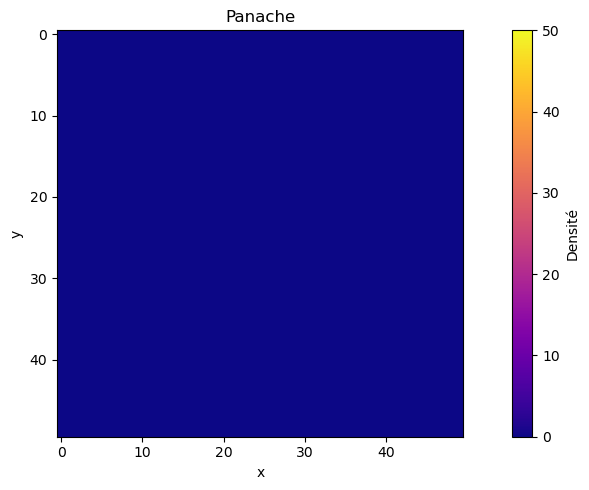

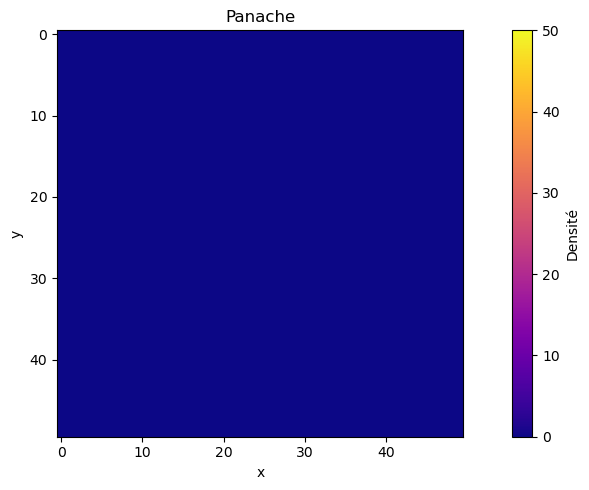

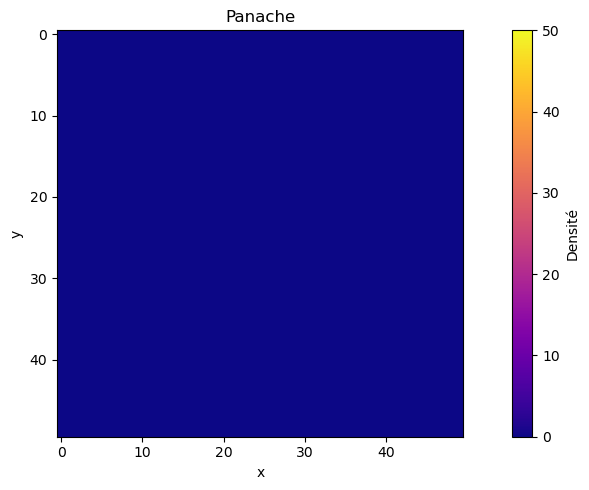

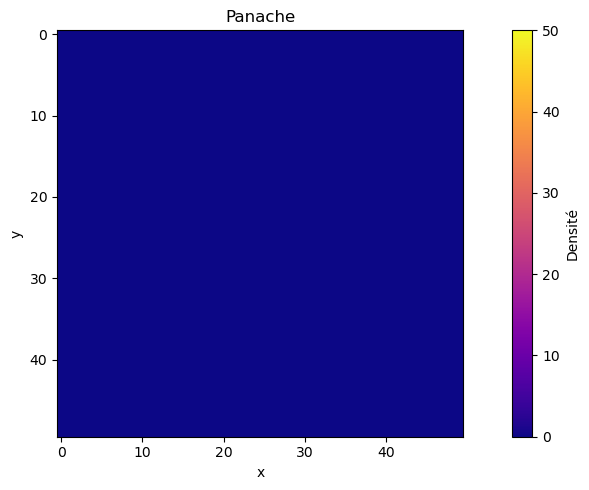

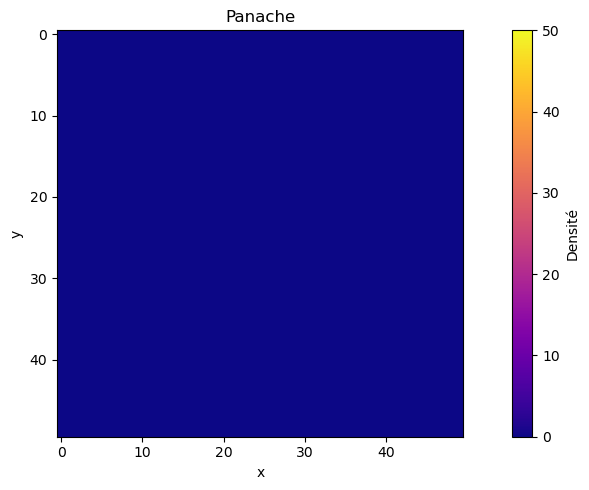

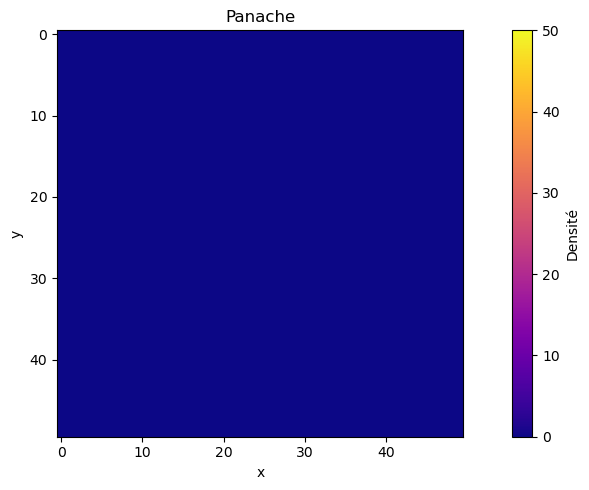

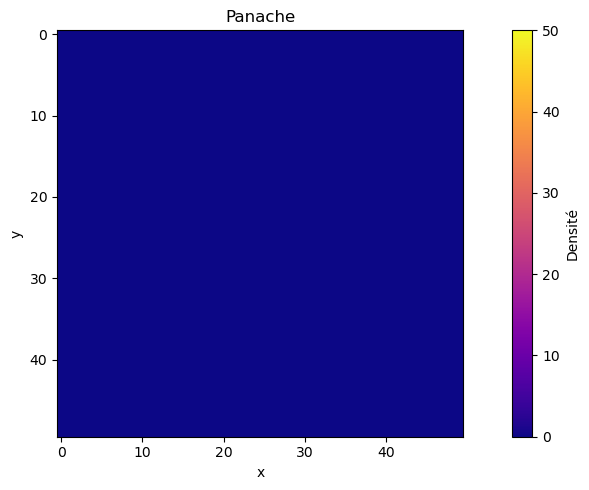

NameError: name 'os' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import io

L = 50
H = 50
sigmax = L/50
sigmay = H/50
q0 = 1/((np.pi *2)**(1/2) * sigmax) 
#q1 = q0/4
a = random.randint(1,5)
print(a)
b = random.randint(1,5) 
print(b)
#x0 = 2*L/10
#y0 = 2*H/10
x0 = 2*L/10
y0 = 2*H/10
dimL = 200
dimH = 200
dimT = 400

def u(x,t):
    return  100 #(1 + np.sin(16*x/5*dimL - t/20))
def w(y,t):
    return 100*( np.sin(10*np.pi*(y/dimH) - t/26) + 0.4*np.sin(33*np.pi /dimH - t/50))


def vitesse_max(u,dim):
    U = abs(u(0,0))
    for x in range(dim):
        for t in range(dimT):
        if abs(u(x,t)) >= abs(U):
            U =  abs(u(x,t))
        #print(U)
    return U
    
def gaussienne2(x,x0,y0,y,q0,t):

    return  (q0**2)*np.exp(-(1/2)*((x-(x0+ u(x,y) * t))/sigmax)**2)*np.exp(-(1/2)*((y-(y0+ u(x,y) * t))/sigmay)**2)

def init_panache(dimx,dimy,x0,y0,q0):
    mat = np.zeros((dimy,dimx))
    for i in range (dimy):
        for j in range (dimx):
        mat[i][j] = gaussienne2(L*j/dimy,x0,y0,L*i/dimx,q0,0)
    return mat

def avancement(dimx,dimy):
    dx = L/dimx
    dy = H/dimy
    dt = min(dx / ((5)*vitesse_max(u,dimx)), dy / ((5)*vitesse_max(w,dimy)))  
    panache_0 = init_panache(dimx,dimy,x0,y0,q0)
    #panache_01 = init_panache(dimx,dimy,x1,y1,q0)
    panache = np.zeros((dimT,dimy,dimx))
    panache[0] = panache_0 #+ panache_01
    #ptsource2 = init_panache(dim,x1,y1,q1)

    for t in range (1,dimT):
        for i in range (dimy):
            for j in range (dimx):
                ay = (w(i,t)*dt/dx)
                ax = (u(j,t)*dt/dx)
                #print(u(j),a)
            if ay > 0:
                if i == 0 :
                if j == 0 :
                    panache[t][i][j] =  (-ay -ax + 1)*panache[t-1][i][j]
                else:
                    panache[t][i][j] =  (-ay -ax + 1)*panache[t-1][i][j] + ax * panache[t-1][i][j-1]
                else:
                if j == 0 :
                    panache[t][i][j] =  (-ay -ax + 1)*panache[t-1][i][j] + ay*panache[t-1][i-1][j]
                else:
                    panache[t][i][j] =  (-ay -ax + 1)*panache[t-1][i][j] + ax * panache[t-1][i][j-1] + ay*panache[t-1][i-1][j]
            else:
                if i == dimy -1:
                    if j == 0 :
                        panache[t][i][j] =  (+ay -ax + 1)*panache[t-1][i][j]
                    else:
                          panache[t][i][j] =  (+ay -ax + 1)*panache[t-1][i][j] + ax * panache[t-1][i][j-1]
                else:
                    if j == 0 :
                        panache[t][i][j] =  (+ay -ax + 1)*panache[t-1][i][j] - ay*panache[t-1][i-1][j]
                    else:
                        panache[t][i][j] =  (+ay -ax + 1)*panache[t-1][i][j] + ax * panache[t-1][i][j-1] - ay*panache[t-1][i+1][j]
                
    for i in range(0,100):
            #liste_panache.append(panache[i])
            #liste_panache.append(panache[i])
            #plt.imshow(panache[k],cmap = plt.cm.gist_stern)  # jet, gist_stern, gnuplot(2), seismic
            #plt.plot(panache[i])
            #plt.title('pour t = {}'.format(i))
            #plt.xlabel('axe des x')
            #plt.ylabel('axe des y')
            #plt.xlim(0,L)
            #plt.ylim(0,200)
            #plt.xticks(np.arange(0, dim, dim//4))
            #plt.yticks(np.arange(0, dim, dim//4))
            #plt.axis('scaled')

            #Ajout d'une colorbar
            #plt.scatter(x=purchaseCount, y=likes, c=ratio, cmap="summer")
            #plt.colorbar(label="Like/Dislike Ratio", orientation="vertical")
            #plt.savefig(f'anim4/panache_{i}.png', dpi=100)

            plt.rcParams["figure.figsize"] = [10, 5]
            plt.rcParams["figure.autolayout"] = True
            plt.imshow(panache[i], cmap="plasma")
            plt.xlabel('x')
            plt.ylabel('y')
            plt.colorbar(label='Densité')
            plt.clim(0,50)            
            plt.title('Panache')
            plt.savefig(f'C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation/panache_{i}.png', dpi=500)
            plt.show()

            #mpimg.imsave(f'C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation/panache_{i}.png',panache[i], cmap = plt.cm.gist_stern)
            #plt.close

avancement(50,50)

#Pour animer les différentes images de panaches qu'on a pu enregistrer dans le dossier animation
liste_fichier = []
liste_fichier = os.listdir("C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation")
#print(liste_fichier)
liste_panache = []
for i in range(0,100):
    im = Image.open(f'C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation/panache_{i}.png')
    new_im = im.resize((1000, 500))
    liste_panache.append(new_im)

liste_panache[0].save('C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation/panache.gif', save_all = True, append_images = liste_panache[1:], optimize = False, duration = 50)